# **Stroke Prediction**

---

**Project Name : Stroke Prediction**

**Author : Tasya Amalia**

# **1. Introduction**


**Tujuan**  
Project ini dibuat untuk membuat model machine learning untuk memprediksi kemungkinan seseorang terkena penyakit stroke di sebuah Rumah Sakit A. Disini akan mengeksplorasi 5 model classification yang berbeda, yaitu K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, dan Random Forest serta meningkatkan algoritma XGBClassifier. Setiap model akan dievaluasi secara cermat dengan _cross validation_ dan matriks evaluasi seperti F1 Score. Setelah mendapatkan model yang terbaik akan dilanjutkan dengan menambahkan parameter untuk meningkatkan akurasinya. `Terakhir, akan membandingkan model yang telah disesuaikan dengan model dasar untuk memilih opsi terbaik dalam memprediksi kemungkinan seseorang terkena penyakit stroke secara akurat.`


Informasi Dataset:

Projek ini menggunakan dataset yang bersumber dari Kaggle berjudul "Stroke Prediction" yang diunggah oleh Fedesoriano. Dataset tersebut berisi informasi mengenai faktor risiko stroke, termasuk rincian seperti jenis kelamin, usia, berbagai kondisi medis, status perkawinan, jenis pekerjaan, tipe tempat tinggal, kadar glukosa, BMI, dan status merokok. Untuk akses ke sumber data dapat [dilihat disini!](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)



| Columns               | Description                                    |
|---------------------- |------------------------------------------------|
| Id                   | Unique identifier                             |
| Gender                | Gender of patient ("Male", "Female" or "Other")            |
| Age                | age of the patient                 |
| Hypertension                | Health related parameter, does person have hypertension (0 if the patient doesn't have hypertension, 1 if the patient has hypertension)|
| Heart Disease                 | Health related parameter, does person have heart disease (0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease)          |
| Ever Married                 | Personal information, is person married on not ("No" or "Yes)              |
| Work_Type           | Nature of work place ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed")|
| Residence Type                  | Residence type of the patient ("Rural" or "Urban")|
| Avg Glucose Level                 | Average glucose level in blood for the patient          |
| BMI                  | body mass index of the patient           |
| Smoking Status                | Habitual information ("formerly smoked", "never smoked", "smokes" or "Unknown")          |
| Stroke                | Our target, is person suffered heart attack (0= No , 1=Yes)           |

# **2. Import Libraries**

In [1]:
# Library Data Manipulation
import pandas as pd
import numpy as np

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Library Preprocessing data
#Spin Train - Test Set
from sklearn.model_selection import train_test_split

# Handling Outlier
from feature_engine.outliers import Winsorizer

# Correlation
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr

# Scaling pakai Robust
from sklearn.preprocessing import RobustScaler

# Encoding OneHot
from sklearn.preprocessing import OneHotEncoder

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTENC

# Library Machine Learning Model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Library Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Library Pipelane
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# For Save Model
import pickle
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Penjelasan:**

Sebelum memulai projek ini, perlu dilakukan mengimport semua library yang diperlukan untuk memfasilitasi pengerjaan tugas ini. Setiap library memiliki fungsi nya masing-masing yang terdiri untuk manipulasi data, visualisasi, pembuatan model, dll.

# **3. Data Loading**

In [2]:
# Melakukan load  data ke dalam pandas DataFrame dari sumber csv

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

**Penjelasan:**

Kode tersebut digunakan untuk membaca file CSV yang bernama `'healthcare-dataset-stroke-data.csv'` yang akan dimuat ke dalam DataFrame yang selanjutkan akan dilakukan manipulasi dan analisis data lebih lanjut. 


#### *3.1 Displaying Top & Bottom Data*
Menampilkan Data Teratas & Terbawah*

In [3]:
# Menampilkan 10 data teratas dari DataFrame
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**Penjelasan:**

Menggunakan pandas .head(10), dapat menampilkan 10 data teratas dari dataset. Sekilas, kolomnya terdiri dari data numerik. 



In [4]:
# Menampilkan 10 data terbawah dari DataFrame
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Penjelasan:**

Menggunakan pandas .tail(10), dapat menampilkan 10 data terbawah dari dataset.

#### *3.2 Displaying Summary Information*

In [5]:
# Menampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**_Penjelasan_**

-  Menggunakan pandas .info() dapat memperoleh ringkasan informasi dari dataset ini, termasuk informasi jumlah baris dan kolom serta tipe data setiap kolom.

- Berdasarkan hasil tersebut, diketahui bahwa data ini terdiri dari `5110 baris dan 12 kolom`.

- Tipe data ini terdiri dari `4 integer, 5 object dan 3 float`

- Pada dataset ini diketahui bahwa terdapat kolom yang memiliki `missing value`, yaitu kolom `bmi`.

#### *3.3 Change the data type of the `age` column*


In [6]:
df['age'] = df['age'].astype(int)

**Penjelasan:**

Kode tersebut berguna untuk mengubah tipe data kolom 'age' dalam DataFrame dari tipe data `float` menjadi tipe data `integer`.

#### *3.4 Check Missing Values*

In [7]:
# Mengecek jumlah missing value
missing_values = df.isnull().sum()

# Menghitung total baris dalam DataFrame
total_rows = df.shape[0]

# Menghitung persentase missing value dari total baris
percentage_missing = (missing_values / total_rows) * 100

# Menampilkan hasil
print("Persentase Missing Value:")
print(percentage_missing)

Persentase Missing Value:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini memiliki data `missing value` yaitu pada kolom `BMI` sebanyak 201 baris atau 3.9% dari jumlah total data yang selanjutnya akan dilakukan handling missing value pada bagian `Feature Engineering`. Untuk menentukan metode handling missing value, perlu diketahui jenis missing value pada kolom `bmi`.

#### *3.5 Check Data Duplicates*

In [8]:
# Cek apakah ada data duplikat
print(f'Jumlah Data Duplikat : {df.duplicated().sum()}')

Jumlah Data Duplikat : 0


**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini tidak memiliki `data duplikat`.

#### *3.6 Displaying Unique Values for Each Column*

In [9]:
# Menampilkan nilai unique pada setiap kolom
unique_values_all = df.apply(pd.Series.unique)

unique_values_all

id                   [9046, 51676, 31112, 60182, 1665, 56669, 53882...
gender                                           [Male, Female, Other]
age                  [67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 5...
hypertension                                                    [0, 1]
heart_disease                                                   [1, 0]
ever_married                                                 [Yes, No]
work_type            [Private, Self-employed, Govt_job, children, N...
Residence_type                                          [Urban, Rural]
avg_glucose_level    [228.69, 202.21, 105.92, 171.23, 174.12, 186.2...
bmi                  [36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...
smoking_status        [formerly smoked, never smoked, smokes, Unknown]
stroke                                                          [1, 0]
dtype: object

**Penjelasan:**

- Kode tersebut berguna untuk menampilkan seluruh nilai unik dari setiap kolom yang ada di DataFrame.


#### *3.7 Drop the 'id' Column*

In [10]:
df.drop(['id'], axis = 1, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Penjelasan:**

Kolom `id` di drop karena memiliki nilai unik pada setiap partisipan dan tidak memiliki peran dalam menentukan model klasifikasi.

#### *3.8 Removing Values 'Other' in the 'Gender' Column*

In [11]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

**Penjelasan:**

Berdasarkan hasil tersebut diketahui bahwa value `other` berjumlah 1 baris, sehingga kami memutuskan untuk menghapus value `other`.

In [12]:
df.drop(df[df['gender'] == 'Other'].index, axis = 0, inplace = True)


**Penjelasan:**

Kode tersebut digunakan untuk memfilter baris yang ada di kolom `gender` sama dengan `other` kemudian hasil filter tersebut akan di hapus berdasarkan `.index` dari baris-baris tersebut. `inplace = True` berarti baris yang dihapus secara permanen dari DataFrame. 

In [13]:
# simpan tabel 
df.to_csv('tabelEDA.csv', index=False)

**Penjelasan:**

Kode tersebut digunakan untuk menyimpan DataFrame `df` ke dalam format file CSV dengan nama `tabelEDA.csv`. Penyimpanan DataFrame ini untuk mempertahankan data yang telah dimodifikasi dapat ditampilkan ke Hugging Face.

# **4. Exploratory Data Analysis (EDA)**

Pada langkah ini, EDA bertujuan `untuk memahami karakteristik, struktur, dan komponen penting dari dataset sebelum melakukan analisis statistik atau pemodelan lebih lanjut`. Dengan mengeksplorasi data dapat mendapatkan wawasan dan pemahaman mengenai dataset yang kami analisis. EDA juga menjadi langkah penting dalam proses analisis data yang membantu dalam memahami konteks data dan membantu dalam memilih model statistik atau algoritma machine learning yang paling sesuai berdasarkan karakteristik data.

## **4.1. Univariate Analysis**


#### **_1. Numerical data descriptive summary_**



In [14]:
# Menampilkan data statisik untuk kolom numerik
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.218634,22.634799,0.00,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


**Penjelasan:**

Berdasarkan hasil analisis tersebut, diketahui bahwa:

- Dataset ini memiliki nilai yang hilang yang terdapat pada kolom `bmi` (4908 baris) sehigga jumlah baris nya berbeda dengan kolom yang lain (5109 baris)

- Rata-rata pasien berusia 43 tahun dan usia tertua nya 82 tahun
- Sekitar 9.75% pasien menderita hipertensi dengan standar deviasi sebesar 0.29 yang menunjukkan mayoritas tidak menderita hipertensi
- Sekitar 5.4% pasien menderita penyakit jantung dengan standar deviasi sebesar 0.22 yang menunjukkan mayoritas tidak menderita penyakit jantung
- Kadar glukosa pasien rata-rata sebesar 106.14 mg/dL dan rentang nya berkisar antara 55.12 hingga 271.74 mg/dL 
- Pasien rata-rata memiliki indeks masa tubuh sebesar 28.89 Kg/m<sup>2
- Sekitar 4.87% pasien mengalami stroke


#### **_2. Categorical data descriptive summary_**



In [15]:
# Menampilkan data statisik untuk kolom kategorik
df.describe(include='object').T

,count,unique,top,freq
gender,5109,2,Female,2994
ever_married,5109,2,Yes,3353
work_type,5109,5,Private,2924
Residence_type,5109,2,Urban,2596
smoking_status,5109,4,never smoked,1892


**Penjelasan:**

Berdasarkan hasil analisis tersebut, diketahui bahwa:
- Mayoritas pasien berjenis kelamin perempuan
- Mayoritas pasien sudah menikah
- Mayoritas pasien bekerja di perusahaan swasta dan bertempat tinggal di perkotaan
- Mayoritas pasien tidak pernah merokok


#### **_3. What is the distribution of stroke disease in the dataset?_**

In [16]:
# Membandingkan distribusi penderita stroke
count_stroke = df['stroke'].value_counts()

print(count_stroke)

stroke
0    4860
1     249
Name: count, dtype: int64


**Visualisasi Data**

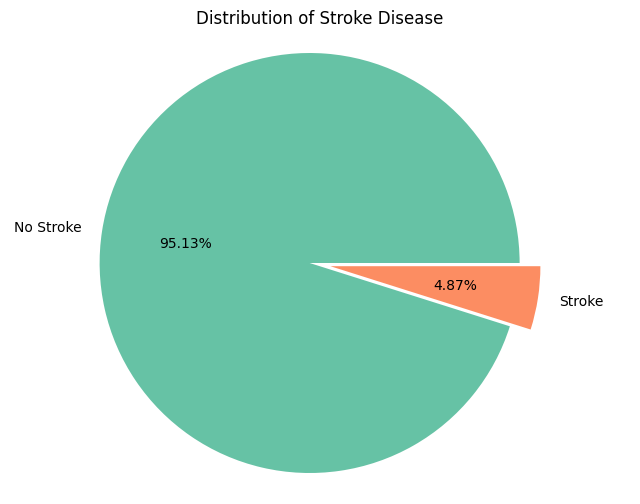

In [17]:
# Mengatur warna untuk tiap visualisasi data
colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 6))
plt.pie(count_stroke, labels=['No Stroke', 'Stroke'], explode = (0.1, 0.0), autopct='%1.2f%%', colors=colors)
plt.title('Distribution of Stroke Disease')
plt.axis('equal')  
plt.show()

**Penjelasan:**

Dari visualisasi distribusi penyakit stroke, diketahui bahwa terdapat 4.87% pasien menderita penyakit stroke dan 95.13% pasien tidak menderita penyakit stroke. Secara umum, proporsi penderita stroke relatif kecil dalam dataset.

#### **_4. What is the distribution of patient ages in the dataset?_**


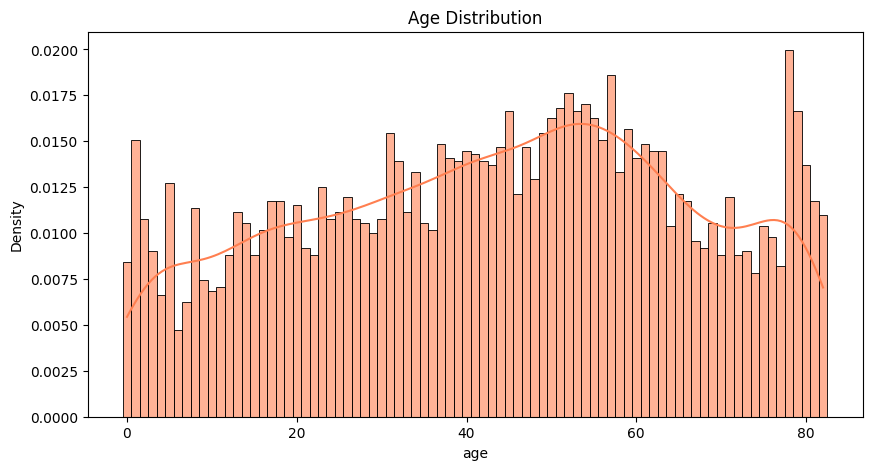

In [18]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(df['age'],kde= True,stat='density', discrete=True, color='coral', alpha=0.6)
axes.set_title('Age Distribution')

# Menghilangkan grid
axes.grid(False)

plt.show()

**Penjelasan:**

Berdasarkan visualisasi distribusi usia, diketahui bahwa persebaran usia pasien berada di 0 - 82 tahun dengan usia terbanyak berada di usia 78 tahun. Hal ini menunjukkan bahwa pentingnya faktor usia terhadap penyakit stroke, risiko meenderita stroke cenderung meningkat seiring bertambahnya usia.

#### **_5. What is the distribution of patient blood glucose levels in the dataset?_**

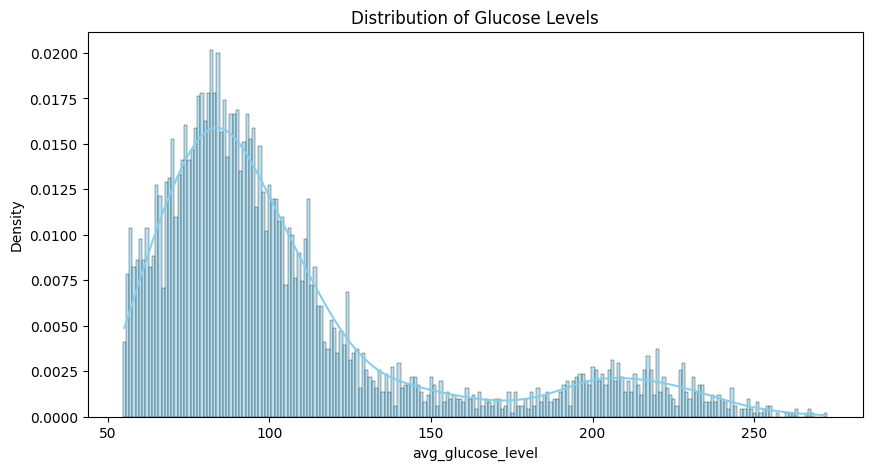

In [19]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(df['avg_glucose_level'],kde= True,stat='density', discrete=True, color='skyblue', alpha=0.6)
axes.set_title('Distribution of Glucose Levels')

# Menghilangkan grid
axes.grid(False)

plt.show()

**Penjelasan:**

Berdasarkan visualisasi distribusi kadar glukosa darah, diketahui bahwa kadar glukosa darah pasien berkisar antara 55.12 - 271.74 mg/dL. Pasien rata-rata memiliki kadar glukosa darah sebesar 106.14 mg/dL. Mayoritas pasien memiliki kadar glukosa yang normal (70 - 110 mg/dL) yang dapat dilihat kurva tinggi di kisaran batasan normal. Meskipun mayoritas pasien memiliki kadar glukosa normal, distribusi juga mencakup pada pasien dengan kadar glukosa di tidak normal. Ini menunjukkan adanya variasi dalam kadar glukosa darah di antara pasien.


#### **_6. What is the distribution of patient BMI in the dataset?_**

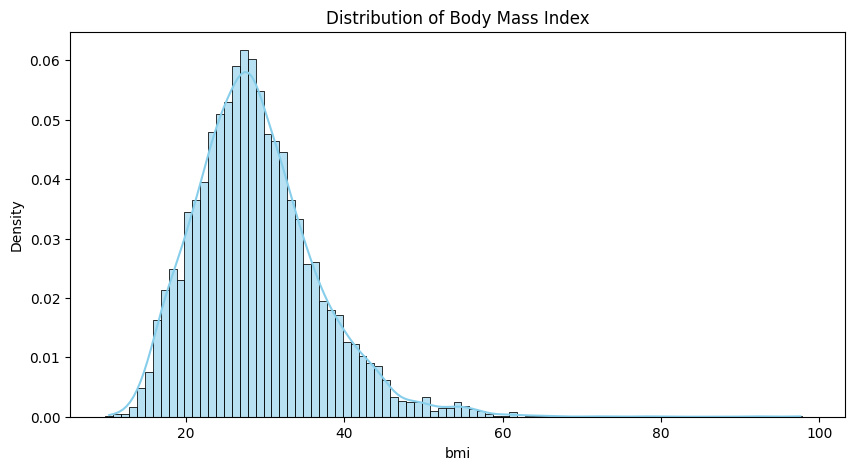

In [20]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(df['bmi'],kde= True,stat='density', discrete=True, color='skyblue', alpha=0.6)
axes.set_title('Distribution of Body Mass Index')

# Menghilangkan grid
axes.grid(False)

plt.show()

**Penjelasan:**

- Berdasarkan visualisasi distribusi BMI, diketahui bahwa BMI pasien berada di rentang 10.3 - 97.6 Kg/m<sup>2. 
- Mayoritas pasien memiliki BMI yang normal (18.5 - 24.9 Kg/m<sup>2). Hal ini ditunjukkan oleh puncak kurva yang tinggi di kisaran batasan normal. 

- Distribusi BMI miring ke kanan. Hal ini berarti bahwa ada lebih banyak pasien dengan BMI di atas normal daripada di bawah normal.



#### **_7. How are patients distributed based on gender, hypertension, heart disease, marital status, smoking status and type of residence in the dataset?_**

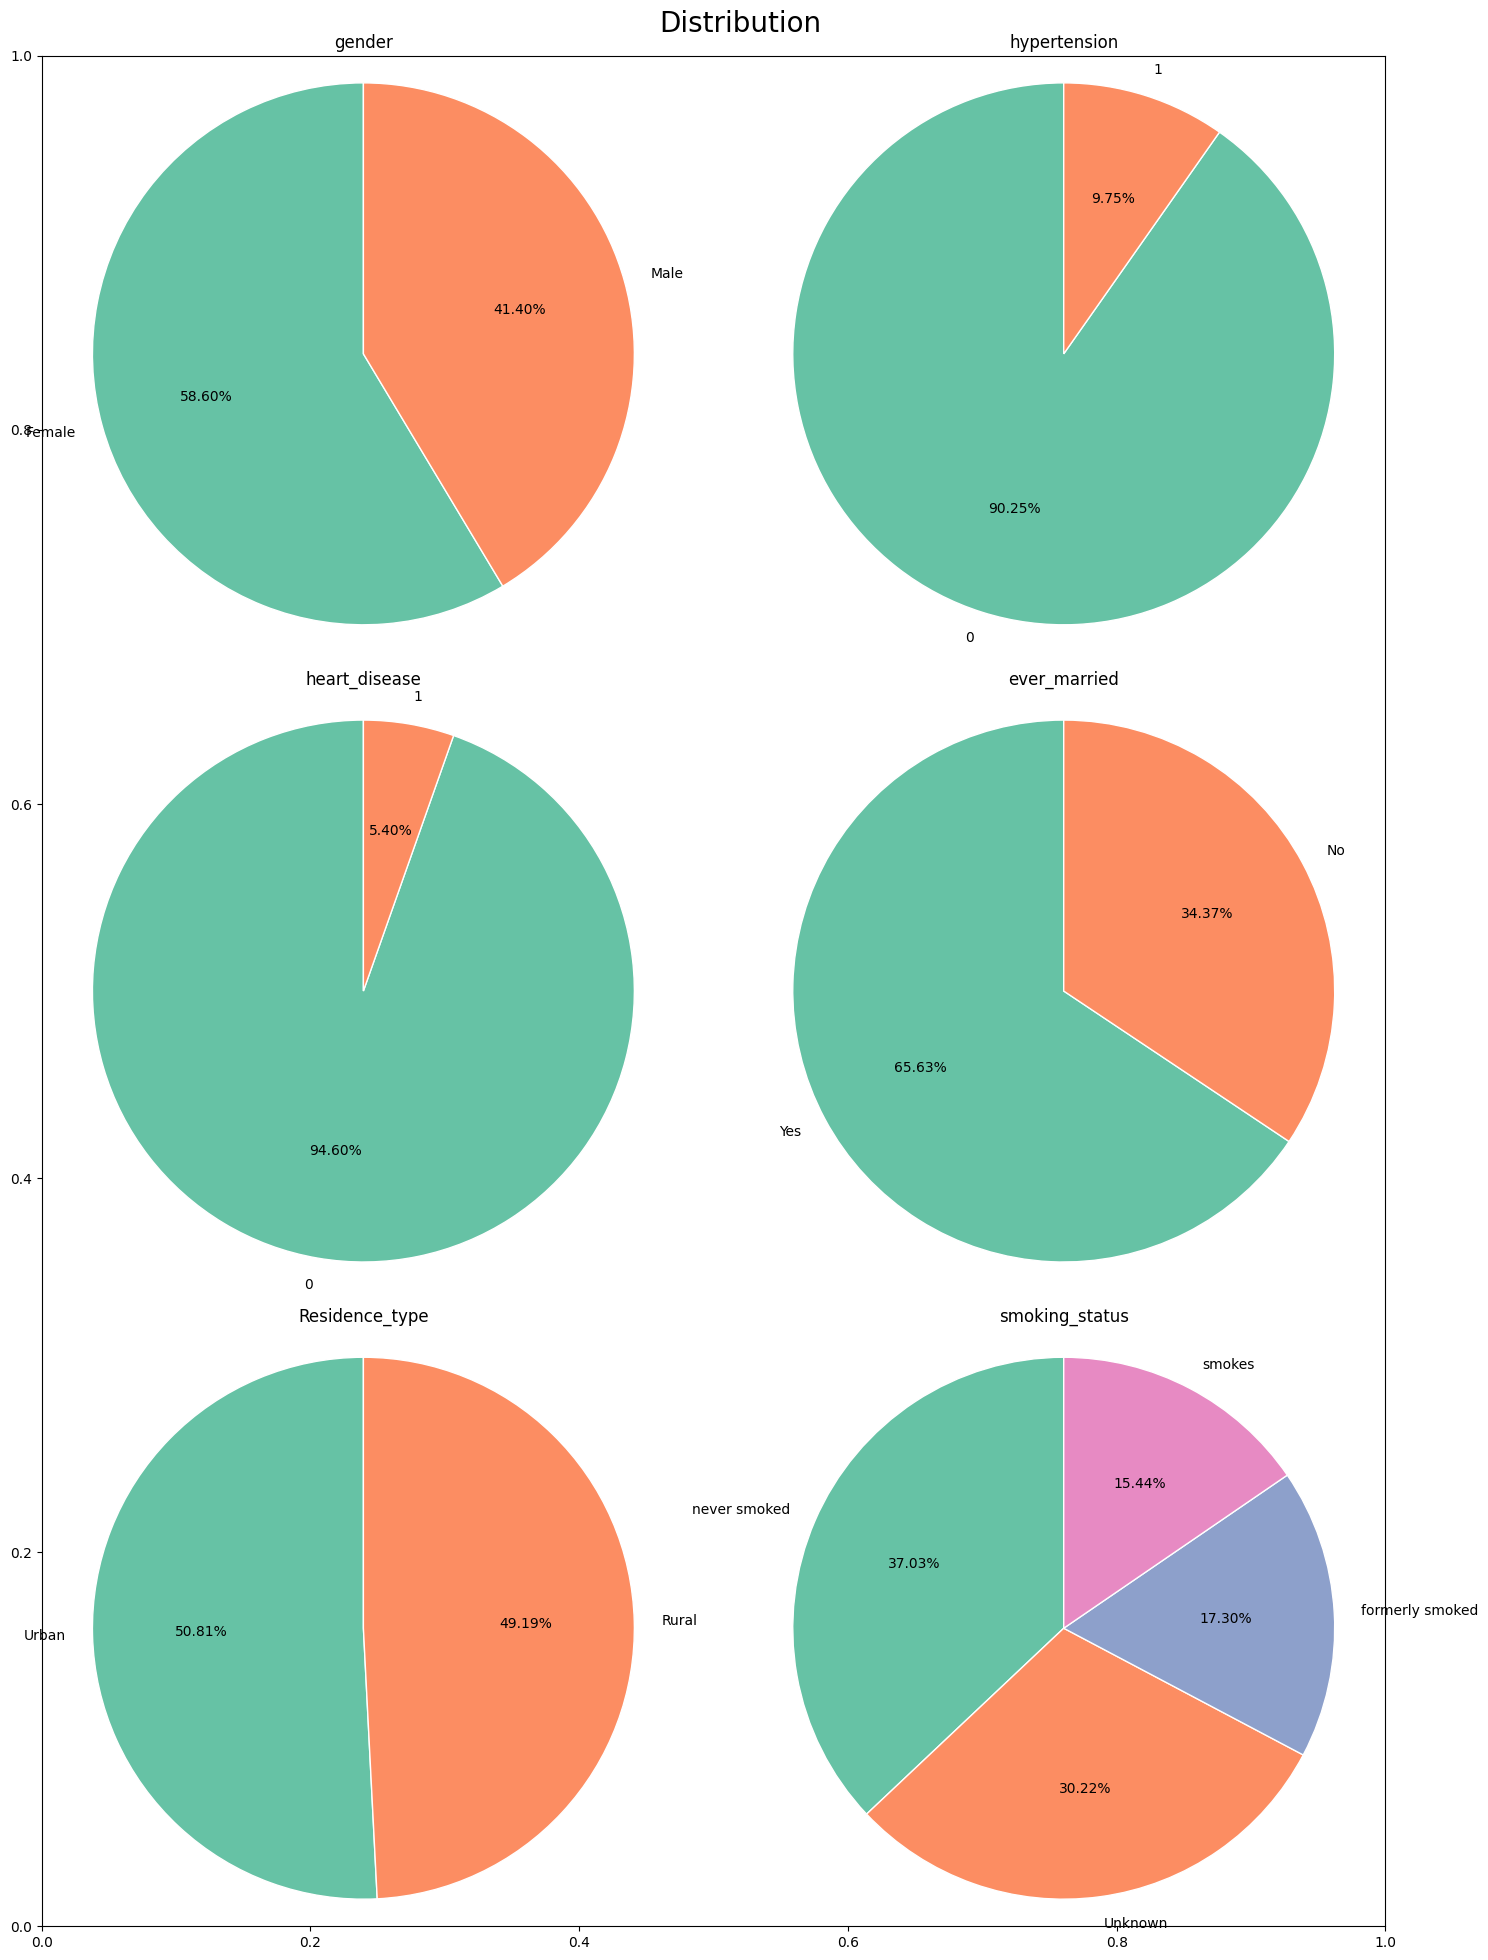

In [21]:
data = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type','smoking_status']]

fig = plt.subplots(figsize=(15,20))

ind = 1  
for i in data:
    plt.subplot(3, 2, ind)
    ind += 1

    # Hitung frekuensi dan buat pie chart
    value_counts = data[i].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', colors=colors, startangle=90,wedgeprops=dict(edgecolor='w'))
    
    plt.axis('equal')
    plt.title(i)
    plt.grid(False) 

plt.suptitle('Distribution', fontsize=20)
plt.tight_layout()
plt.show()


**Penjelasan:**

Berdasarkan visualisasi faktor risiko stroke, diketahui bahwa:
- Mayoritas pasien berjenis kelamin perempuan sebesar 58.60% dibandingan dengan laki-laki sebesar 41.40%
- Sekitar 90.25% pasien tidak memiliki riwayat hipertensi dan 9.75% pasien memiliki riwayat hipertensi
- Sekitar 94.60% pasien tidak memiliki penyakit jantung dan 5.40% pasien memiliki penyakit jantung
- Mayoritas pasien sudah menikah sebesar 65.63% sedangkan yang belum menikah sebesar 34.37%
- Mayoritas pasien bertempat tinggal di perkotaan sebesar 50.81% dibandingkan di perdesaan sebesar 49.19%
- Sekitar 37% pasien tidak merokok, 30.22% tidak diketahui status merokok pasien, 17.30% pasien sebelumnya pernah merokok, dan 15.44% pasien merokok. 


#### **_8. What is the distribution of work types in the dataset?_**

In [22]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

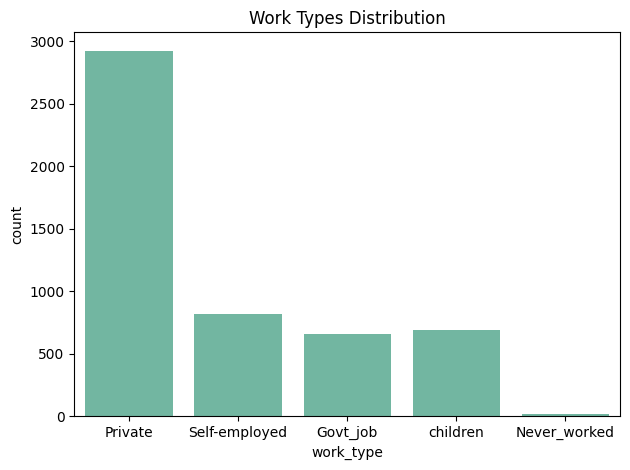

In [23]:
plt.title('Work Types Distribution')
sns.countplot(data = df, x = 'work_type', color=colors[0])
plt.tight_layout()
plt.show()

**Penjelasan:**

Berdasarkan visualisasi tipe pekerjaan, diketahui bahwa mayoritas pasien bekerja di perusahaan swasta `(private)` sebanyak 2924 pasien (57.23%), kemudian sebanyak 819 pasien (16.03%) memiliki usaha sendiri atau pengusaha `(Self Employed)`, sebanyak 687 pasien (13.45%) masih tergolong anak-anak `(children)`, sebanyak 657 pasien (12.86%) bekerja di sektor pemerintahan `(Gov Job)` dan sebanyak 22 pasien (0.43%) belum pernah bekerja sepanjang hidupnya `(Never Worked)`.


## **4.2. Bivariate Analysis**

#### **_1. How do risk factors influence Stroke Disease?_**

In [24]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
# Menghitung jumlah default payment dan non-default payment berdasarkan jenis kelamin
gender_stroke_count = df.pivot_table(index='gender', columns='stroke', aggfunc='size', fill_value=0)

# Memberikan label pada indeks baris dan kolom
gender_stroke_count.index = pd.Index(['Male', 'Female'], name='gender')
gender_stroke_count.columns = pd.Index(['No Stroke', 'Stroke'], name='stroke')

print(gender_stroke_count)

stroke  No Stroke  Stroke
gender                   
Male         2853     141
Female       2007     108


In [29]:
# Menghitung jumlah default payment dan non-default payment berdasarkan jenis kelamin
residence_stroke_count = df.pivot_table(index='Residence_type', columns='stroke', aggfunc='size', fill_value=0)

# Memberikan label pada indeks baris dan kolom
residence_stroke_count.index = pd.Index(['Urban', 'Rural'], name='Residence_type')
residence_stroke_count.columns = pd.Index(['No Stroke', 'Stroke'], name='stroke')

print(residence_stroke_count)

stroke          No Stroke  Stroke
Residence_type                   
Urban                2399     114
Rural                2461     135


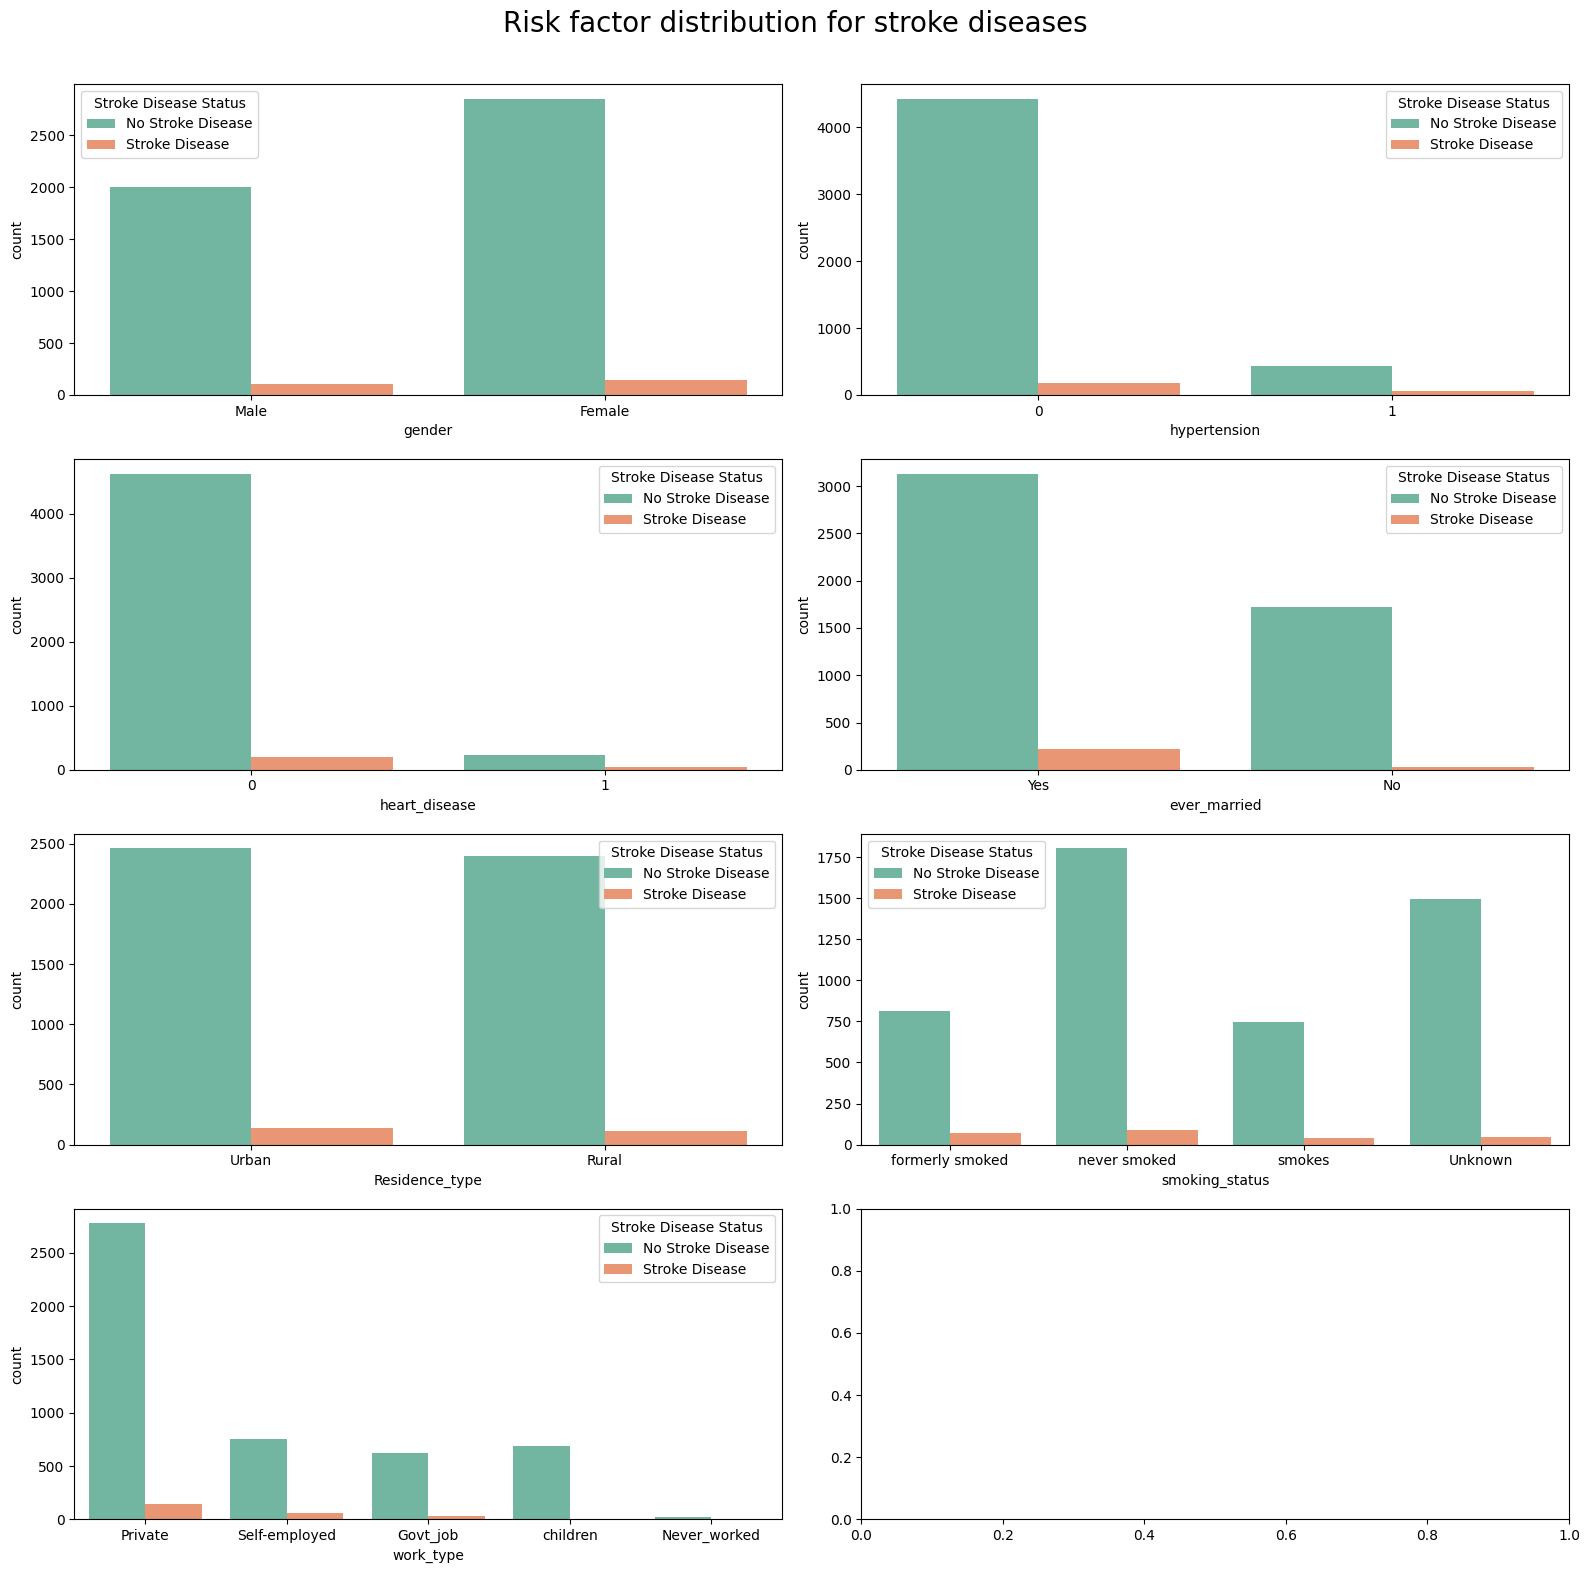

In [ ]:
data1 = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type','smoking_status', 'work_type']]

# Membuat subplot dengan 4 baris dan 2 kolom
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# Iterasi melalui data1
for i, a in enumerate(data1):
    row = i // 2  
    col = i % 2   
    ax = sns.countplot(x=a, hue='stroke', data=df, palette=colors, ax=axs[row, col])
    
    # Menambahkan label legend 
    ax.legend(title='Stroke Disease Status', labels=['No Stroke Disease', 'Stroke Disease'])

plt.suptitle('Risk factor distribution for stroke diseases', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])  
plt.show()


**Penjelasan:**

1. **Gender**:
   - Mayoritas pasien laki-laki maupun perempuan tidak menderita stroke 

2. **Hypertension**:
   - Mayoritas pasien yang tidak menderita stroke juga tidak memiliki hipertensi.
   - Ada sedikit peningkatan pada pasien yang memiliki hipertensi dan menderita stroke, menunjukkan bahwa hipertensi mungkin merupakan faktor risiko untuk penyakit stroke. 

3. **Heart Disease**:
   - Mayoritas pasien yang tidak menderita stroke juga tidak memiliki penyakit jantung.
   - Ada sedikit peningkatan pada pasien yang memiliki penyakit jantung dan menderita stroke, menunjukkan bahwa penyakit jantung mungkin merupakan faktor risiko untuk penyakit stroke. 

4. **Ever Married**:
   - Mayoritas pasien yang pernah menikah menderita stroke.
   - Distribusi pasien yang menderita stroke lebih banyak pada pasien yang pernah menikah, namun perbedaannya tidak terlalu signifikan.

5. **Residence Type**:
   - Baik di daerah urban maupun rural, jumlah kasus stroke lebih rendah dibandingkan dengan yang tidak mengalami stroke.
   - Distribusi antara urban dan rural tampaknya serupa, dengan proporsi yang hampir sama untuk kasus stroke dan tidak stroke.

6. **Smoking Status**:
   - Mayoritas pasien yang tidak menderita stroke adalah bukan perokok.
   - Ada sedikit peningkatan pada pasien yang merokok dan menderita stroke, menunjukkan bahwa merokok mungkin merupakan faktor risiko untuk penyakit stroke.

7. **Work Type**:
   - Mayoritas pasien yang tidak menderita stroke bekerja di sektor swasta.
   - Jumlah kasus stroke lebih rendah di semua jenis pekerjaan dibandingkan dengan yang tidak mengalami stroke, namun perbedaannya tidak terlalu signifikan.



#### **_2. What is the relationship between age, blood glucose levels, BMI and stroke?_**

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

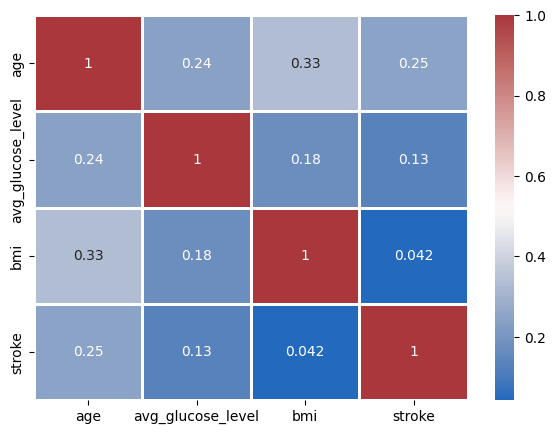

In [ ]:
features = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
plt.figure(figsize=(7,5))
sns.heatmap(features.corr(), cmap="vlag", annot=True, linewidths=.8)

# Menampilkan heatmap
plt.show()


**Penjelasan:**

Kekuatan Korelasi:
- r = 0 - 0.25 = Tidak ada huhungan / hubungan lemah
- r = 0.26 - 0.50 = Hubungan sedang
- r = 0.51 - 0.75  = Hubungan kuat
- r = 0/76 - 1 = Hubungan sangat kuat / sempurna

Berdasarkan visualisasi data mengenai hubungan antara berbagai variabel, diketahui bahwa:

- `Usia dan Stroke:` Terdapat korelasi antara variabel usia dan stroke yaitu 0.25, yang menunjukkan hubungan positif. Semakin bertambahnya usia seseorang, semakin besar kemungkinan mereka mengalami stroke, meskipun hubungan ini berkorelasi sedang. 

- `Rata-rata Kadar Glukosa dan Stroke`: Terdapat korelasi antara variabel kadar glukosa dan stroke yaitu 0.13, yang menunjukkan hubungan positif namun cukup lemah. Semakin tinggi kadar glukosa darah maka semakinn besar kemungkinan mengalami stroke. 

- `BMI dan Stroke`: Tidak Terdapat korelasi antara variabel BMI dan stroke yaitu 0.042.


## **4.3. Multivariate Analysis**

**Penyakit Stroke Berdasarkan Status Pernikahan, Jenis Kelamin, Hipertensi dan Penyakit Jantung**

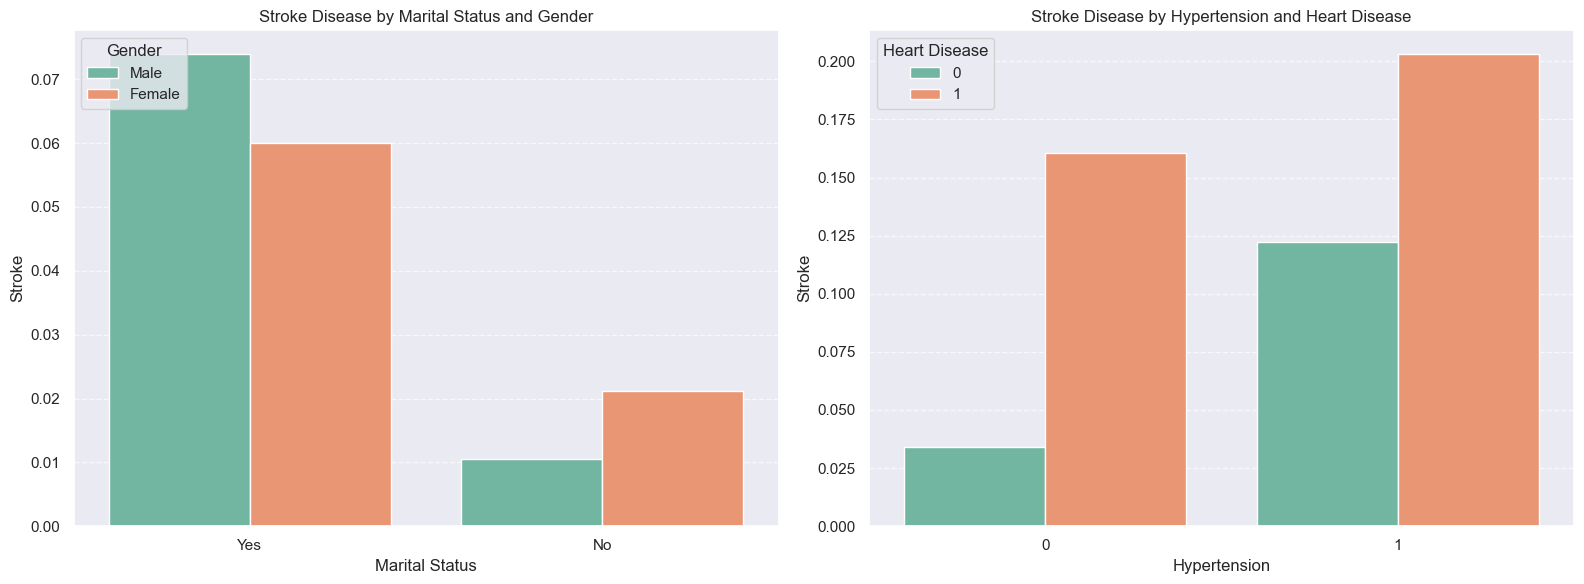

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Membuat barplot Stroke berdasarkan Status Pernikahan dan Jenis Kelamin
sns.barplot(data=df, x='ever_married', y='stroke', hue='gender',palette=colors, ci=None, dodge=True, ax=axes[0])
axes[0].set_title('Stroke Disease by Marital Status and Gender')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Stroke')
axes[0].legend(title='Gender', loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Membuat barplot Stroke berdasarkan Hipertensi dan Penyakit Jantung
sns.barplot(data=df, x='hypertension', y='stroke', hue='heart_disease', palette=colors, ci=None, ax=axes[1])
axes[1].set_title('Stroke Disease by Hypertension and Heart Disease')
axes[1].set_xlabel('Hypertension')
axes[1].set_ylabel('Stroke')
axes[1].legend(title='Heart Disease')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan tata letak dan menampilkan barplot
plt.tight_layout()
plt.show()


**Penjelasan:**

**Grafik Stroke berdasarkan Status Pernikahan dan Jenis Kelamin**
- Laki-Laki maupun perempuan yang pernah menikah memiliki proporsi kejadian stroke yang lebih tinggi dibandingkan dengan yang tidak pernah menikah.

- Laki-laki yang pernah menikah memiliki persentase kejadian stroke lebih tinggi dibandingkan perempuan yang pernah menikah.
- Laki-Laki memiliki risiko penyakit stroke lebih tinggi dibandingkan dengan perempuan. Perbedaan risiko stroke pada laki-laki ataupun perempuan mungkin dipengaruhi oleh perbedaan gaya hidup, seperti kebiasaan merokok dan konsumsi alkohol yang lebih tinggi pada laki-laki. Selain itu, status pernikahan dapat meningkatkan risiko stroke terutama pada laki-laki, hal tersebut dapat terjadi karena faktor seperti stres dan tanggung jawab keluarga.


**Grafik Stroke berdasarkan Hipertensi dan Penyakit Jantung**
- Pasien yang memiliki riwayat hipertensi dan juga memiliki penyakit jantung berada pada risiko yang sangat tinggi untuk mengalami kejadian stroke.

- Hubungan antara hipertensi dan penyakit jantung menunjukkan risiko tertinggi untuk kejadian stroke. Ini menunjukkan bahwa upaya pencegahan dan pengelolaan kedua kondisi kesehatan tersebut sangat penting untuk mengurangi risiko stroke.
- Hipertensi menyebabkan menyempitnya atau pecahnya pembuluh darah otak yang akan mengakibatkan gangguan aliran darah ke otak bahkan menyebabkan kematian sel-sel otak. 

**Penyakit Stroke Berdasarkan Tipe Pekerjaan, Tempat Tinggal, Status Merokok dan Hipertensi**

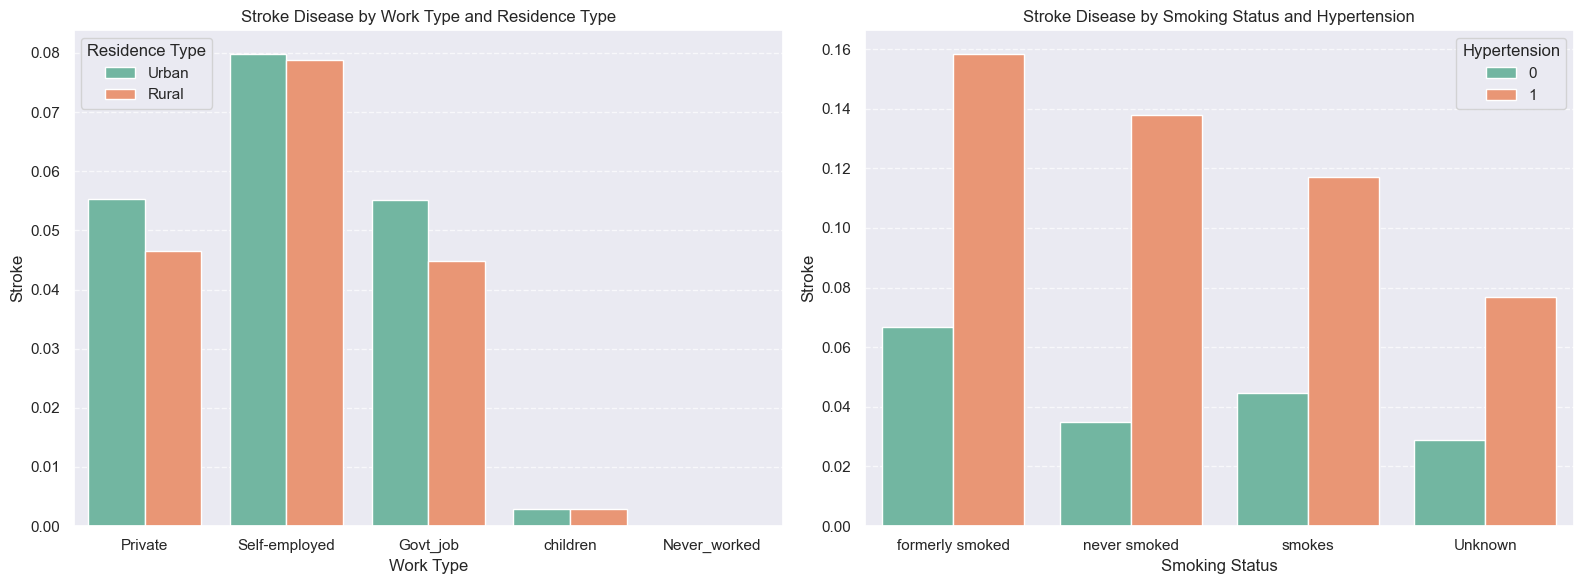

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Membuat barplot Stroke berdasarkan Tipe Pekerjaan dan Tempat Tinggal
sns.barplot(data=df, x='work_type', y='stroke', hue='Residence_type',palette=colors, ci=None, dodge=True, ax=axes[0])
axes[0].set_title('Stroke Disease by Work Type and Residence Type')
axes[0].set_xlabel('Work Type')
axes[0].set_ylabel('Stroke')
axes[0].legend(title='Residence Type', loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Membuat barplot Stroke berdasarkan Status Merokok dan Hipertensi
sns.barplot(data=df, x='smoking_status', y='stroke', hue='hypertension', palette=colors, ci=None, ax=axes[1])
axes[1].set_title('Stroke Disease by Smoking Status and Hypertension')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Stroke')
axes[1].legend(title='Hypertension')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan tata letak dan menampilkan barplot
plt.tight_layout()
plt.show()


**Penjelasan:**

**Grafik Stroke berdasarkan Tipe Pekerjaan dan Tempat Tinggal**

- Kejadain stroke pada pasien yang memiliki usaha (pengusaha) dan tinggal di daerah perkotaan lebih tinggi dibandingkan dengan mereka yang tinggal di perdesaan.  Ini menunjukkan bahwa pengusaha mungkin memiliki faktor risiko tertentu yang meningkatkan kejadian stroke, seperti stres yang lebih tinggi. Selain itu, pasien yang tinggal di perkotaan memiliki gaya hidup yang lebih sedentari atau tingkat stres yang lebih tinggi di lingkungan kerja perkotaan.



# **5. Feature Engineering**
-  Feature Engineering merupakan salah satu tahapan yang paling penting untuk melakukan machine learning. Tujuan dari bagian ini untuk meningkatkan kualitas data yang digunakan dalam model machine learning dengan cara mengubah atau mengekstraksi fitur-fitur yang lebih berkualitas dari data mentah. Berikut langkah-langkah dari `Feature Engineering`:


## **5.1 Split Train - Test Set**


**Penjelasan:**

Bagian ini dilakukan oleh `library scikit-learn` untuk membagi data menjadi dua set, yaitu untuk `melatih model (training set)` dan `menguji model (testing set)`.


In [ ]:
# Menentukan kolom features (X) and kolom target (Y)
x = df.drop(columns=['stroke'], axis=1)
y = df['stroke']


**Penjelasan**

Kode diatas membagi dataset menjadi 2 bagian, yaitu:
- `x` sebagai fitur yang berisi semua kolom kecuali `kolom stroke`
- `y` sebagai target yang berisi hanya `kolom stroke`

Pembagian dataset menjadi 2 bagian ini untuk mengurangi resiko `overfitting` yang memastikan bahwa model tidak hanya belajar dari training set saja  namun juga dapat memprediksi secara akurat untuk data testing.


In [ ]:
# split train - test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=30)


# cek total baris dan kolom features dan target dari train - test set
print(f'x_train baris dan kolom: {x_train.shape}')
print(f'x_test baris dan kolom: {x_test.shape}')
print(f'y_train baris dan kolom: {y_train.shape}')
print(f'y_test baris dan kolom: {y_test.shape}')



x_train baris dan kolom: (3576, 10)
x_test baris dan kolom: (1533, 10)
y_train baris dan kolom: (3576,)
y_test baris dan kolom: (1533,)


**Penjelasan:**

Berdasarkan hasil diatas diketahui bahwa:
- `Training Test (x_train, y_train)` terdiri dari 3576 baris dan 10 kolom. Training set digunakan untuk mempelajari pola dan hubungan antara fitur dan target. Pola-pola yang dipelajari akan digunakan oleh model untuk membuat prediksi pada data baru yang diberikan.


- `Testing Test (x_test, y_test)` terdiri dari 1533 baris dan 10 kolom. Testing set digunakan untuk menguji seberapa baik model dapat  melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

- Disini ditetapkan ukuran set pengujian sebesar 30% (`ukuran_tes = 0.3`), mengalokasikan `30%  ke Testing Test dan 80% ke Training Test`. Keseimbangan ini memastikan jumlah data yang cukup untuk pelatihan dan pengujian sekaligus mencegah over-fitting.

- Selain itu, pengaturan `random_state = 30` memastikan reproduktifitas, yaitu memastikan bahwa proses pengacakan dataset menghasilkan hasil yang konsisten setiap saat, sehingga kode dapat direproduksi.

## **5.2 Handling Missing Value**

In [ ]:
# Cek missing values pada fitur dan target
print(f'X Train Missing Values : {x_train.isnull().sum()}')
print(f'X Test Missing Values : {x_test.isnull().sum()}')
print(f'y Train Missing Values : {y_train.isnull().sum()}')
print(f'y Test  Missing Values : {y_test.isnull().sum()}')

X Train Missing Values : gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  130
smoking_status         0
dtype: int64
X Test Missing Values : gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  71
smoking_status        0
dtype: int64
y Train Missing Values : 0
y Test  Missing Values : 0


**Penjelasan**:

- Berdasarkan hasil tersebut diketahui bahwa terdapat nilai kosong pada fitur `bmi`, yaitu `x_train terdapat 130 nilai kosong dan x_test terdapat 71 nilai kosong`. `Handling missing value` dilakukan setelah pembagian data menjadi 2 set dikarenakan untuk mencegah kebocoran data dan memungkinkan evaluasi model lebih akurat.

- Untuk melakukan handling missing value, kita identfikasi terlebih dahulu apakah missing value pada kolom `bmi` memiliki keterkaitan dengan kolom lain seperti karakteristik umur individu dalam Datafrme.



In [ ]:
# Memisahkan data pelatihan berdasarkan apakah BMI hilang atau tidak
missing_bmi_train = x_train[x_train['bmi'].isnull()]['age']
not_missing_bmi_train = x_train[~x_train['bmi'].isnull()]['age']

# Uji T-Independent pada data pelatihan
t_stat_train, p_value_train = stats.ttest_ind(missing_bmi_train, not_missing_bmi_train, nan_policy='omit')

print(f'T-statistic for train data: {t_stat_train}')
print(f'P-value for train data: {p_value_train}')

# Membagi usia kedalam beberapa kategori untuk data pelatihan
x_train['age_bin'] = pd.cut(x_train['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Tabel kontingensi untuk data pelatihan
contingency_table_train = pd.crosstab(x_train['age_bin'], x_train['bmi'].isnull())

# Uji Chi-Square untuk data pelatihan
chi2_train, p_train, dof_train, expected_train = stats.chi2_contingency(contingency_table_train)

print(f'Chi-square statistic for train data: {chi2_train}')
print(f'P-value for train data: {p_train}')



T-statistic for train data: 4.553262164098849
P-value for train data: 5.4581187214808605e-06
Chi-square statistic for train data: 42.68317407523172
P-value for train data: 3.839965856647881e-07


**Penjelasan:**

- P-value (_T-statistic_): Nilai p-value < 0.05, menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik dalam rata-rata umur antara kelompok yang memiliki nilai BMI yang hilang dan kelompok yang memiliki nilai BMI yang tidak hilang. 

- P-value (_Chi-square_): Nilai p-value < 0.05, menunjukkan bahwa terdapat hubungan yang signifikan secara statistik antara variabel 'age_bin' dan status missing pada variabel 'bmi'. 

- Berdasarkan analisis yang telah dilakukan, jenis missing value pada kolom BMI dapat diidentifikasi sebagai _Missing Not at Random (MNAR)_. `MNAR` merupakan jenis missing value dengan pola tertentu yang terkait dengan fitur lainya.

- Oleh karena itu, kami memutuskan untuk handling missing value dengan `Imputasi dengan nilai median`.


**Imputasi dengan nilai median**

In [ ]:
# Menghitung nilai median dari kolom BMI pada x_train
median_bmi = x_train['bmi'].median()

# Mengisi nilai yang hilang pada kolom BMI dengan median
x_train['bmi'].fillna(median_bmi, inplace=True)
x_test['bmi'].fillna(median_bmi, inplace=True)

**Penjelasan:**

- Kode tersebut untuk mengisi nilai missing value pada kolom `bmi` di x_train dan x_test dengan nilai median dari kolom `bmi` pada x_train.

- Pemilihan nilai median dikarenakan distribusi data pada kolom `bmi` tidak berdistribusi normal atau memiliki `skewness`. Selain itu, nilai median lebih tahan terhadap outlier. 








In [ ]:
x_train.drop(columns=['age_bin'], inplace=True)

**Penjelasan:**

Kode tersebut digunakan untuk menghapus kolom 'age_bin' dari DataFrame x_train karena tidak diikut sertakan dalam pemodelan. 



## **5.3 Handling Outlier**


In [ ]:
# Memilih kolom-kolom numerik dari DataFrame x_train
kolom_numerik = x_train.select_dtypes(include=np.number).columns.to_list()

# Container kolom data tidak berdistribusi normal
data_skewed_numerik = []
kolom_skewed_numerik = []

# Container kolom data  berdistribusi normal
data_normal_numerik = []
kolom_normal_numerik = []

# Looping di setiap kolom numerik untuk memasukkan data kedalam distribusi normal atau tidak normal
for column in kolom_numerik:
    skewness = x_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        kolom_normal_numerik.append(column)
        data_normal_numerik.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        kolom_skewed_numerik.append(column)
        data_skewed_numerik.append([column, skewness])

**Penjelasan:**

- Langkah awal yang dilakukan yaitu mengetahui distribusi data setiap kolom untuk menentukan metode apa yang digunakan saat penanganan outlier.

- Kode diatas untuk mengidentifikasi distribusi data setiap kolom numerik di x_train dengan metode skew() dan looping (for), diketahui bahwa:

    `Jika nilai skewness kurang dari sama dengan 0.5 dan lebih dari sama dengan -0.5 maka data berdistribusi normal.`
    
    `Jika nilai skewness kurang dari -0.5 atau lebih besar dari 0.5  maka data tidak berdistribusi normal.`




In [ ]:
# Menampilkan kolom dengan data berdistribusi normal
print('Kolom dengan Data Berdistribusi Normal')
pd.DataFrame(data=data_normal_numerik, columns=['Kolom Distribusi Normal', 'Nilai skewness'])

Kolom dengan Data Berdistribusi Normal


,Kolom Distribusi Normal,Nilai skewness
0,age,-0.138711


**Penjelasan:**

- Berdasarkan tabel tersebut diketahui bahwa kolom `age` berdistribusi normal ( skewness <= 0.5 dan >= -0.5). `Oleh karena itu, penanganan outlier dilakukan dengan metode Gaussian menggunakan modul winorizer`.

- Metode Gaussian di winorizer digunakan untuk menangani outlier dengan mengganti nilai ekstrim dengan nilai dari distribusi Gaussian. Metode  ini mengubah nilai-nilai yang berada di luar kisaran nilai tertentu menjadi nilai-nilai yang berada di batas atas (*upper bound*) atau batas bawah (*lower bound*) dari distribusi Gaussian.

In [ ]:
# Menampilkan kolom dengan data tidak berdistribusi normal
print('Kolom dengan Data Tidak Berdistribusi Normal')
pd.DataFrame(data=data_skewed_numerik, columns=['Kolom Skewed', 'Nilai Skewness'])

Kolom dengan Data Tidak Berdistribusi Normal


,Kolom Skewed,Nilai Skewness
0,hypertension,2.655407
1,heart_disease,3.998731
2,avg_glucose_level,1.551391
3,bmi,1.034379


**Penjelasan:**

- Berdasarkan tabel tersebut diketahui bahwa kolom `hypertension, heart disease, avg glucose level dan bmi` tidak berdistribusi normal (skewness > 0,5 dan < -5). `Oleh karena itu, penanganan outlier dilakukan dengan IQR yang menggunakan modul winorizer`.


- Metode IQR (Rentang Interkuartil) di winorizer digunakan untuk menangani outlier dalam data dengan mempertimbangkan kisaran nilai antara kuartil bawah (Q1) dan kuartil atas (Q3) dari distribusi data.


**Visualisasi Data**

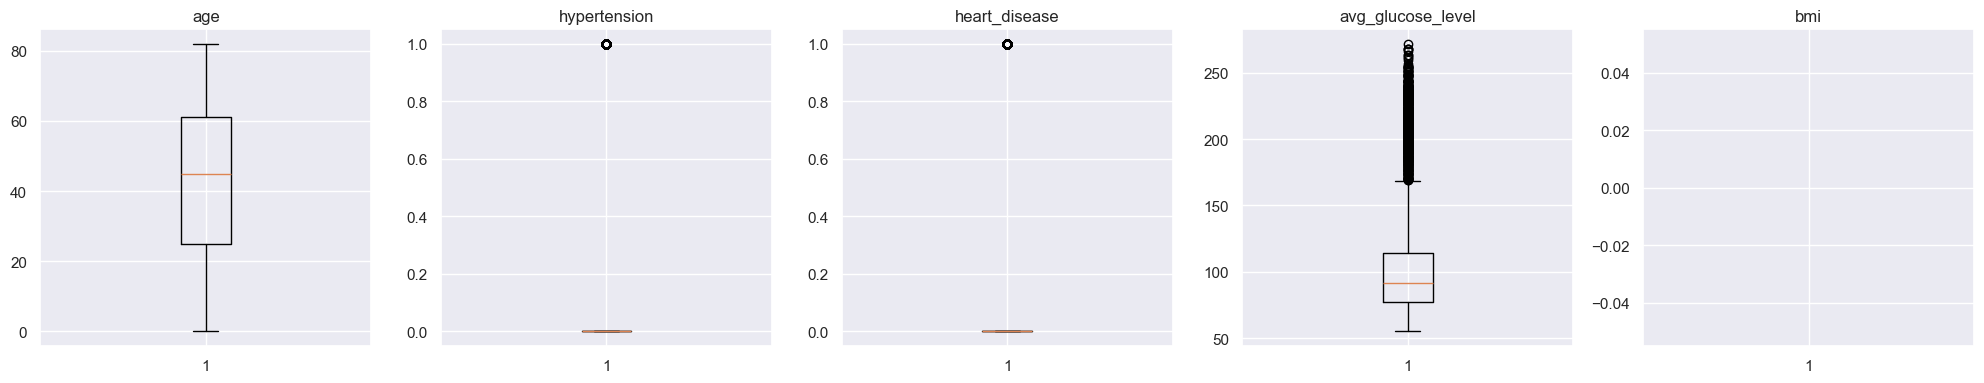

In [ ]:
# Menampilkan visualisasi data mengenai outlier pada data
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom numerik
for i, column in enumerate(kolom_numerik):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()

plt.show()

**Penjelasan:**

**Age**
- Usia rata-rata berada sekitar 40-45 tahun.
- Usia terendah sekitar 0 tahun dan usia tertinggi mendekati 80 tahun
- Rentang usia sebagian besar antara 20 dan 60 tahun.

**Hypertension**
- Hasil boxplot menunjukkan bahwa sebagian besar populasi tidak memiliki hipertensi.
- Terdapat beberapa outlier pada populasi yang memiliki hipertensi.

**Heart Disease**
- Hasil boxplot menunjukkan bahwa sebagian besar populasi tidak memiliki penyakit jantung.
- Terdapat beberapa outlier pada populasi yang memiliki penyakit jantung.

**Avg glucose Level**
- Rata-rata kadar glukosa berada sekitar 100 mg/dL.
- Nilai terendah sekitar 50 mg/dL dan nilai tertinggi lebih dari 250 mg/dL.
- Terdapat banyak outlier yang memiliki kadar glukosa lebih tinggi dari batas normal.




### ***Capping or Censoring Method***

Metode ini digunakan untuk menangani outlier dengan membatasi distribusi data dengan menetapkan batas atas (upper bound) atau batas bawah (lower bound) untuk nilai-nilai data. Dengan metode ini dapat mempertahankan jumlah sampel karena nilai outlier pada data ini hanya dibatasi dan tetap dipertahankan dalam dataset sehingga menghindari kehilangan informasi yang mungkin penting.

In [ ]:
# define low variation columns in normal_distributed_columns
low_var_cols_skewed = ['hypertension', 'heart_disease']

# Drop the low variation columns in skewed columns
for column in low_var_cols_skewed:
    kolom_skewed_numerik.remove(column)

**Penjelasan:**

Kode tersebut untuk mengeluarkan kolom dengan variasi rendah dari kolom data yang tidak berdistribusi normal untuk tidak diikutsertakan handling outlier. Hal ini karena rentang nilai nya tidak terlalu jauh dari mean/median sehingga tidak diperlukan handling outlier dan memfokuskan handling outlier untuk high variation.


##### **Capping Untuk Data Berdistribusi Normal**

In [ ]:
# Metode Capping Data Distribusi Normal
winsorizer_dist_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_normal_numerik,
                            missing_values='ignore')  # Mengabaikan nilai missing value

# Melakukan fitting dan transforming pada x_train
x_train_capped = winsorizer_dist_normal.fit_transform(x_train)

# Melakukan transforming pada x_test
x_test_capped = winsorizer_dist_normal.transform(x_test)


**Penjelasan:**

Kode tersebut menangani outlier dengan `metode Gaussian` untuk kolom data yang berdistribusi normal.


##### **Capping Untuk Data Tidak Berdistribusi Normal**

In [ ]:
# Metode Capping Data Distribusi Normal
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_skewed_numerik,
                            missing_values='ignore') # Mengabaikan nilai missing value

# Melakukan fitting dan transforming pada x_train
x_train_capped = winsorizer_skewed.fit_transform(x_train_capped)

# Melakukan transforming pada x_test
x_test_capped = winsorizer_skewed.transform(x_test_capped)

**Penjelasan:**

Kode tersebut menangani outlier dengan `metode iqr` untuk kolom data yang tidak berdistribusi normal.


In [ ]:
# Menambahkan kembali kolom-kolom dengan low variation ke dalam kolom skewed
for column in low_var_cols_skewed:
    kolom_skewed_numerik.append(column)


**Penjelasan:**

Mengembalikan kolom dengan varian rendah ke dalam kolom dengan data tidak berdistribusi norma dan selanjutnya akan dilakukan analisis lebih lanjut. 


**Visualisasi Data**

In [ ]:
sns.set_theme()

# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling

    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot

    Example:
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


**Penjelasan:**

Kode tersebut untuk membuat fungsi yang akan membandingkan distribusi fitur sebelum dan sesudah penanganan outlier.


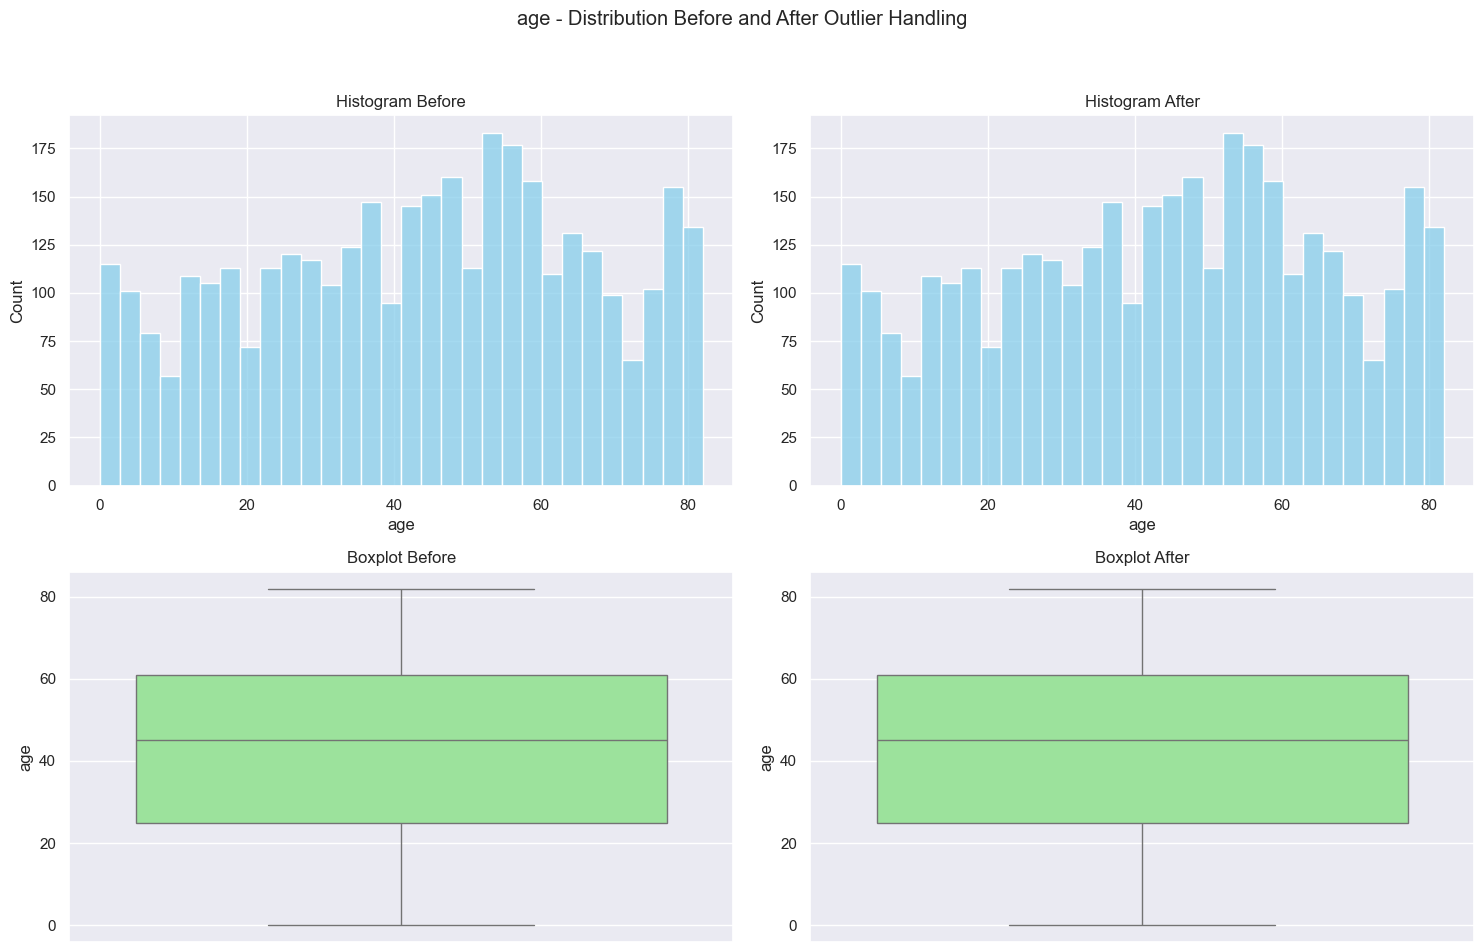

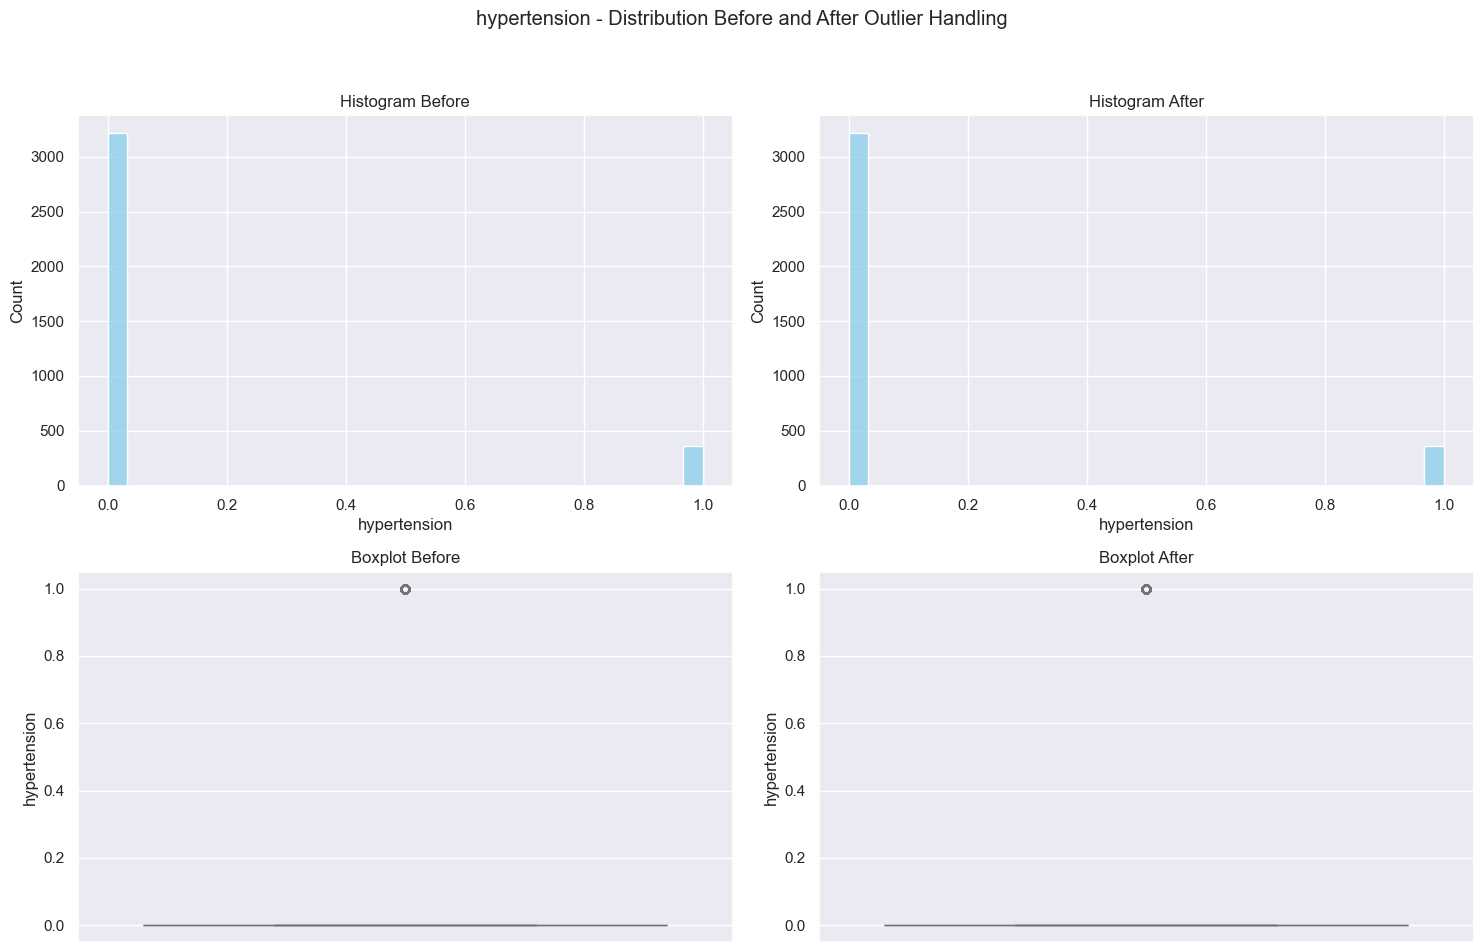

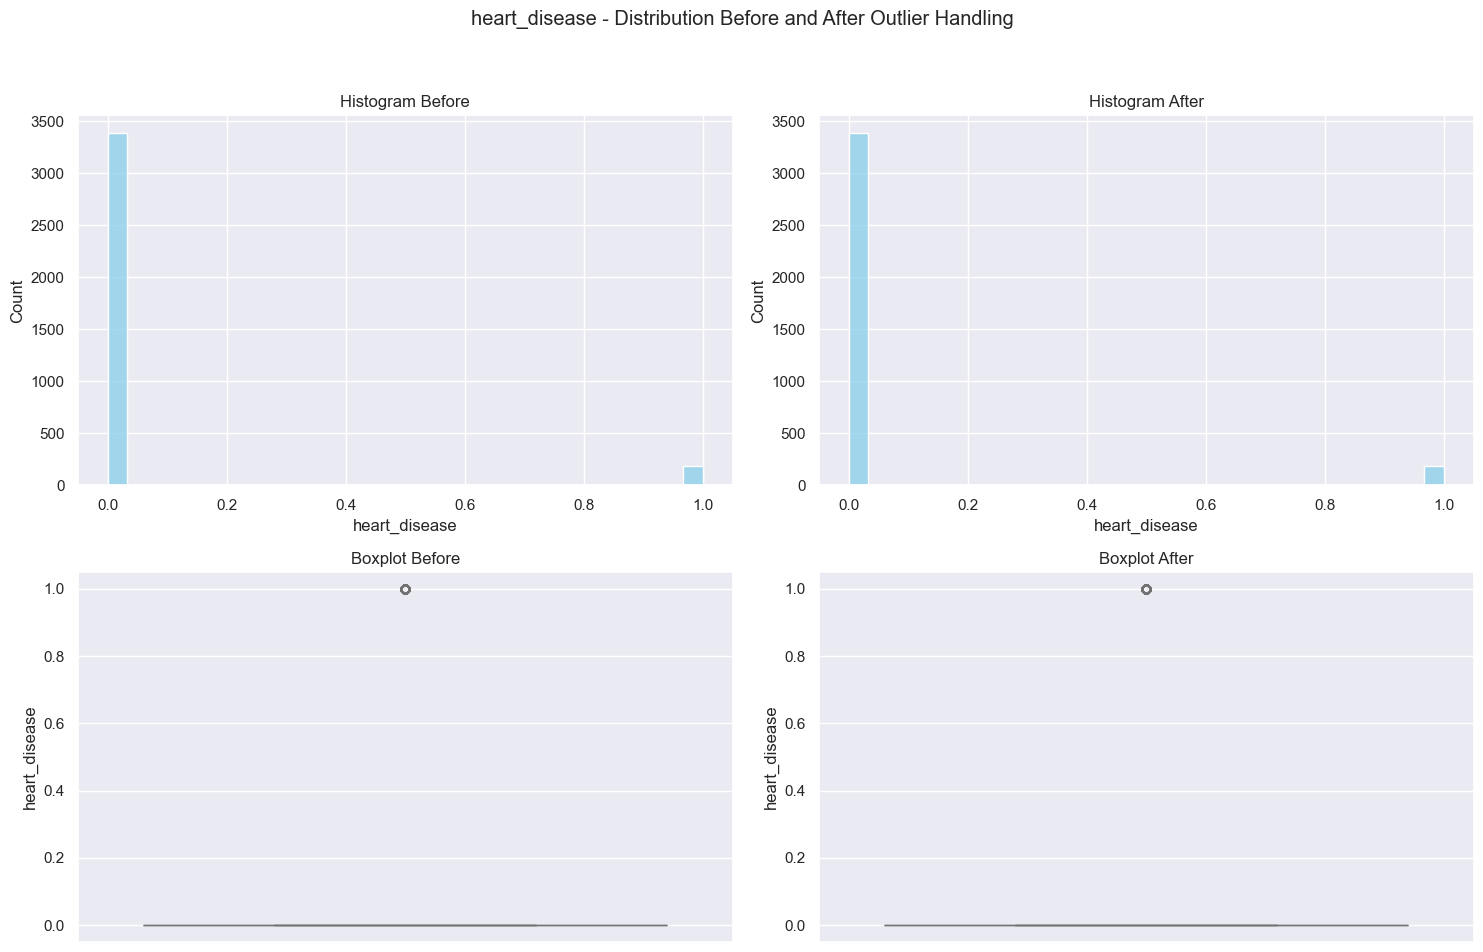

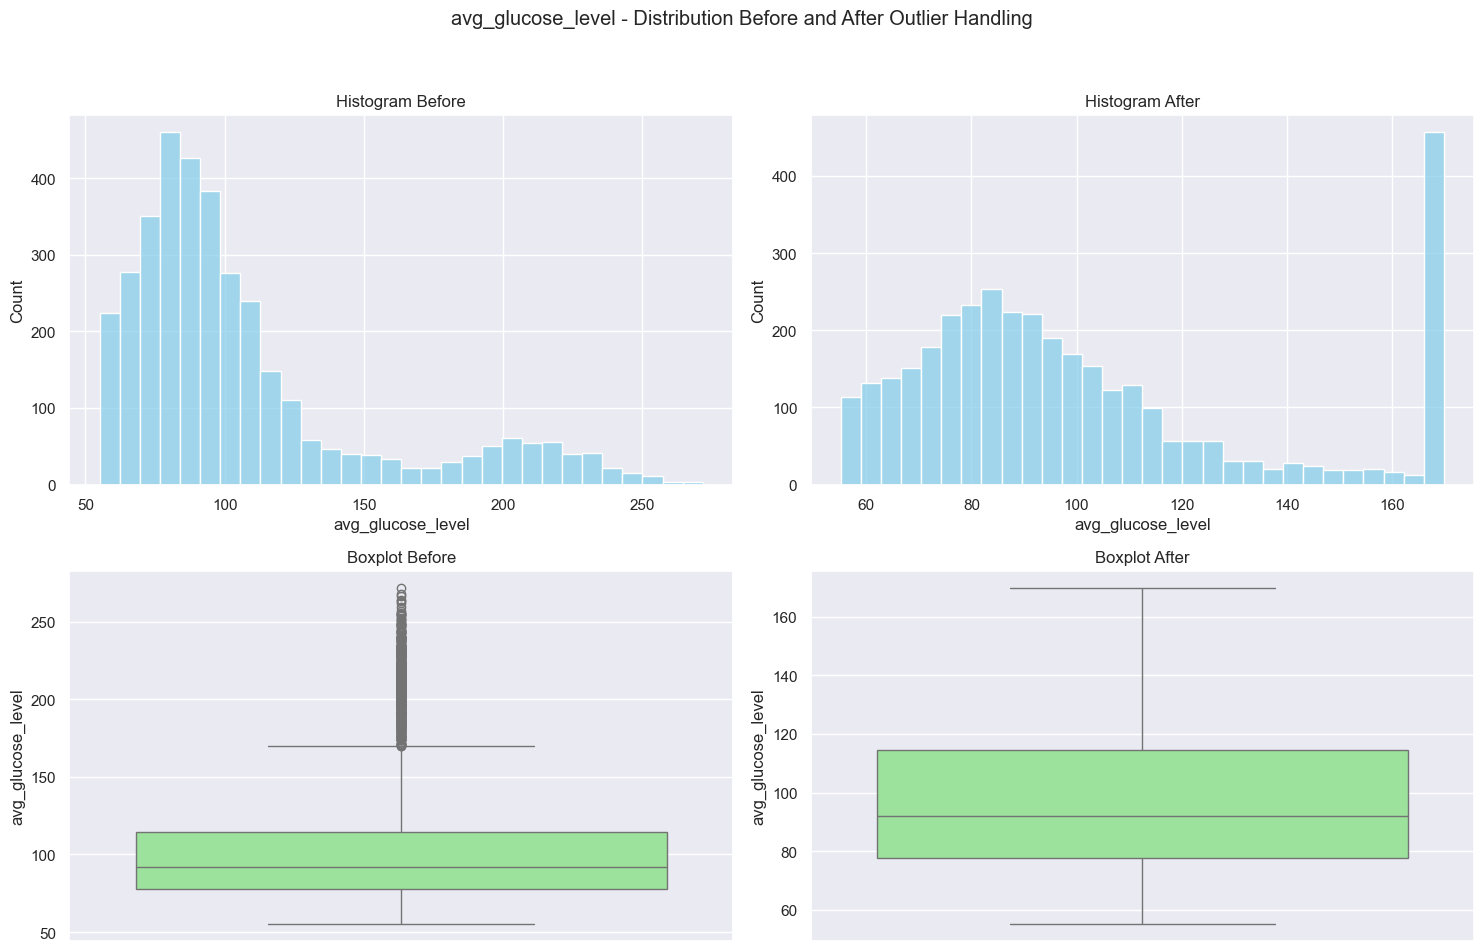

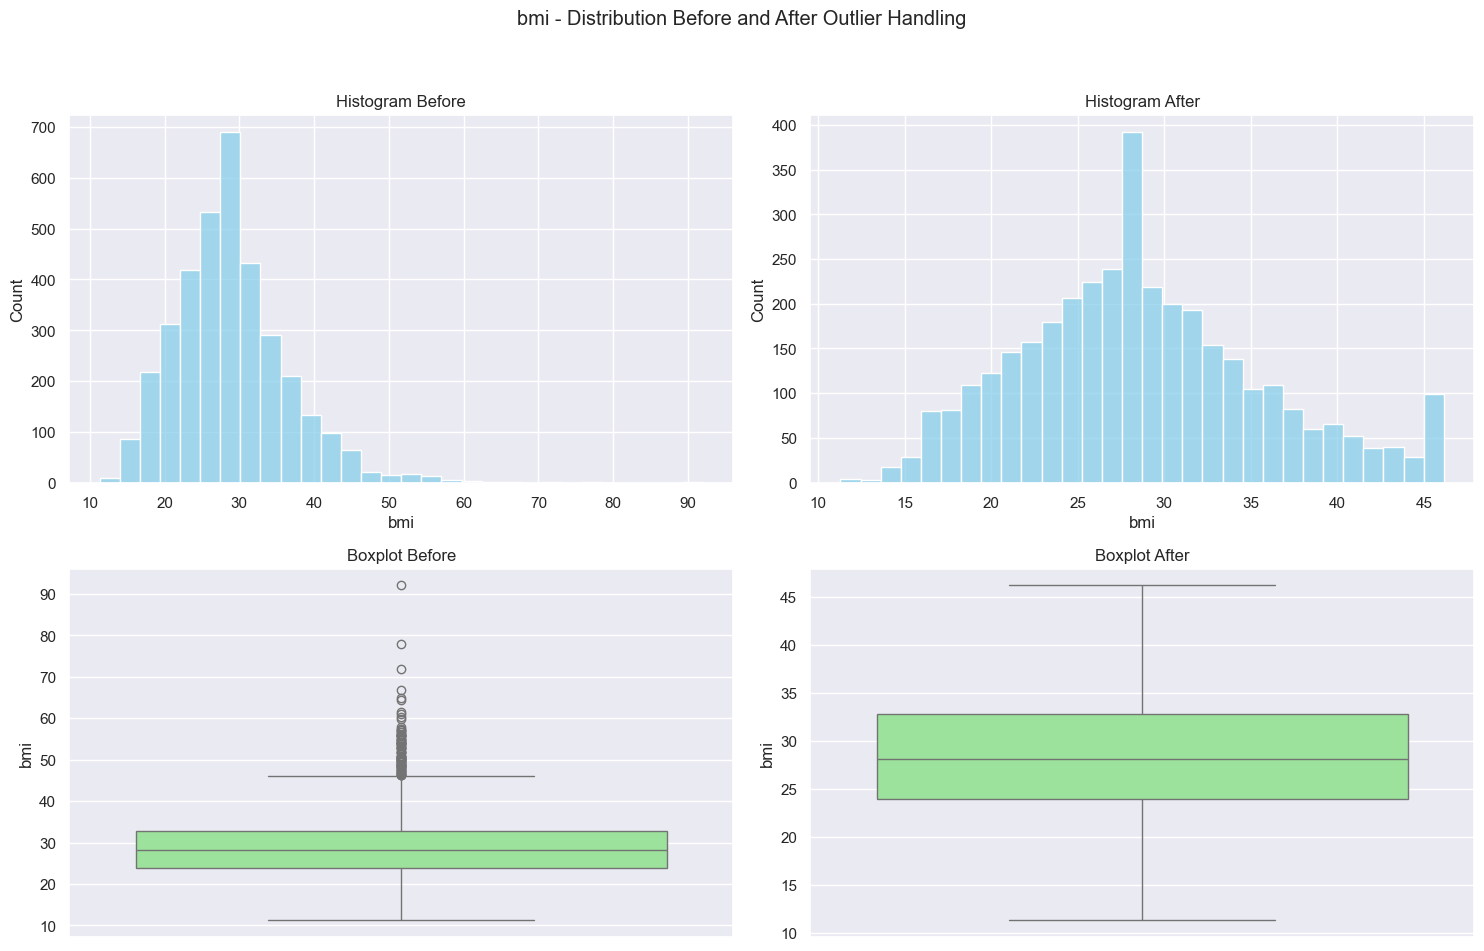

In [ ]:
# Memanggil fungsi outlier_handling_plot_comparison()
num_cols = kolom_numerik
for col in num_cols:
    outlier_handling_plot_comparison(x_train, x_train_capped, col)

**Penjelasan:**

Berdasarkan visualisasi data mengenai fitur sebelum dan sesudah handling outlier dengan metode _capping_ dapat disimpulkan efektif  dalam mengatasi outlier dengan memotong nilai-nilai ekstrem di atas batas tertentu yang membantu distribusi data yang lebih terkontrol dan simetris.

In [ ]:
# Memisahkan data numerik dan kategorik
num_columns = x_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = x_train_capped.select_dtypes(include=['object']).columns.tolist()

**Penjelasan:**

Setelah dilakukan handling outlier, selanjutnya yaitu proses memisahkan kolom menjadi kolom data numerik dan kolom data kategorik. Proses ini digunakan untuk mempermudah analisis lebih lanjut yaitu `Feature Selection`.  Dengan membagi data menjadi kategorikal dan numerik, kita dapat dengan mudah menerapkan transformasi yang sesuai pada setiap jenis fitur.

In [ ]:
# Cek isi kolum data kategorik dan numerik
print('Kolom kategorik :', cat_columns)
print('Kolom numerik :', num_columns)

Kolom kategorik : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Kolom numerik : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [ ]:
# Cek Jumlah data
print('Jumlah kolom kategorik :', len(cat_columns))
print('Jumlah kolom numerik :', len(num_columns))

Jumlah kolom kategorik : 5
Jumlah kolom numerik : 5


**Penjelasan:**

Berdasarkan hasil tersebut diketahui bahwa jumlah kolom kategorik sebanyak 5 kolom, yaitu `gender, ever_married, work_type, residence_type, smoking_status` dan jumlah kolom numerik sebanyak 5 kolom, yaitu `age, hypertension, heart_disease, avg_glucose_level, 'bmi.`

In [ ]:
# Membagi x_train dan x_test berdasarkan data numerik dan kategorik
x_train_num = x_train_capped[num_columns]
x_train_cat = x_train_capped[cat_columns]

x_test_num = x_test_capped[num_columns]
x_test_cat = x_test_capped[cat_columns]

**Penjelasan:**

Membagi data x_train dan x_test setelah handling outlier bedasarkan data numerik dan kategorik

## **5.4. Feature Selection**


### ***5.4.1 Cardinality***

Cardinality berguna untuk mengetahui jumlah nilai untuk setiap fitur, karen setiap fitur ada yang memiliki `low cardinality` dan `high cardinality`. Selain itu proses cardinality dapat membantu memahami kompleksitas fitur dan menyeleksi fitur yang dapat dipertahankan atau tidak.

In [ ]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    Fungsi ini memeriksa nilai unik dan status cardinality di setiap kolom dalam dataset
    '''
    # Mengambil nama kolom dari dataframe
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []

    # Iterasi setiap kolom
    for column in column_names:
        # Menghitung jumlah nilai unik dalam setiap kolom
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)
        unique_values.append(sorted(dataframe[column].unique().tolist()))

         # Menentukan status cardinality berdasarkan jumlah nilai unik
        if unique_count > 10:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")

    # Membat dictionary untuk menyimpan data
    data = {'column_names': column_names,
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}

    print('Tabel Cardinality Status')
    display(pd.DataFrame(data=data))

check_column_cardinality(df)



Tabel Cardinality Status


,column_names,total_unique_counts,unique_values,cardinality_status
0,gender,2,"[Female, Male]",low
1,age,83,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",high
2,hypertension,2,"[0, 1]",low
3,heart_disease,2,"[0, 1]",low
4,ever_married,2,"[No, Yes]",low
5,work_type,5,"[Govt_job, Never_worked, Private, Self-employe...",low
6,Residence_type,2,"[Rural, Urban]",low
7,avg_glucose_level,3978,"[55.12, 55.22, 55.23, 55.25, 55.26, 55.27, 55....",high
8,bmi,419,"[10.3, 19.4, 36.6, nan, 11.3, 11.5, 12.0, 12.3...",high
9,smoking_status,4,"[Unknown, formerly smoked, never smoked, smokes]",low


**Penjelasan:**

- Berdasarkan tabel tersebut diketahui sebagain besar terdiri dari kolom yang memiliki `low cardinality` (8 kolom ) dan kolom yang memiliki `hight= cardinality` hanya terdiri dari 3 kolom.

- Kolom yang memiliki `low cardinality`, yaitu `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status` dan `stroke`.

### ***5.4.2 Correlation***

Analisis korelasi digunakan untuk mengetahui hubungan antara setiap fitur dengan target. Dari informasi tersebut nantinya akan digunakan untuk memilih fitur apa saya yang akan dipertahankan dalam pemodelan.


In [ ]:
# Mencari korelasi antara kolom kategori dengan 'stroke' menggunakan korelasi Kendall Tau

p_values = []
interpretation = []
cols = []
corr = []

for col in x_train_cat.columns:
  corr_coef, p_value = kendalltau(x_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,gender,-0.006646,6.910922e-01,No Significant Correlation
1,ever_married,0.109441,6.003662e-11,Significant Correlation
2,work_type,-0.020319,1.938561e-01,No Significant Correlation
3,Residence_type,0.012123,4.685288e-01,No Significant Correlation
4,smoking_status,0.030021,5.127797e-02,No Significant Correlation


**Penjelasan:**

Analisis korelasi menggunakan uji kendall tau yang digunakan untuk mengetahui hubungan antara kategorikal dengan kolom `stroke` (target). Berdasarkan hasil analisis tersebut, diketahui bahwa hanya fitur `ever married` yang memiliki hubungan signifikan  dengan `target (stroke)`

In [ ]:
# Mencari korelasi antara kolom kategori dengan 'stroke' menggunakan uji pearson dan spearman

p_values = []
interpretation = []
cols = []
corr = []

for col in x_train_num.columns:
  if abs(x_train_num[col].skew()) < 0.5:                    # Untuk kolom dengan data berdistribusi normal
    corr_coef, p_value = pearsonr(x_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     # Untuk kolom dengan data tidak berdistribusi normal
    corr_coef, p_value = spearmanr(x_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,age,0.259730,3.200668e-56,Significant Correlation
1,hypertension,0.153449,2.764962e-20,Significant Correlation
2,heart_disease,0.148651,4.040368e-19,Significant Correlation
3,avg_glucose_level,0.080333,1.509453e-06,Significant Correlation
4,bmi,0.040090,1.650758e-02,Significant Correlation


**Penjelasan:**

Uji pearson digunakan untuk mengetahui korelasi hubungan fitur dengan target pada data distribusi normal sedangkan uji spearman digunakan untuk uji korelasi fitur dengan target dengan data tidak berdistribusi normal. Berdasarkan hasil analisis tersebut, diketahui bahwa semua fitur memiliki hubungan signifikan  dengan `target (stroke)`

**Memilih fitur yang signifikan**

In [ ]:
# Membuat variabel baru yang memiliki hubungan korelasi dengan target.
selected_num_col = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
selected_cat_col = ['ever_married']


**Penjelasan:**

Memilih beberapa fitur yang akan dipertahankan berdasarkan hasil statistik, yaitu hanya fitur yang memiliki hubungan yang signifikan dengan target. 
- selected_num_col merupakan variabel yang berisi kolom-kolom numerik dari fitur yang telah dipilih
- selected_cat_col merupakan variabel yang berisi kolom-kolom kategorik dari fitur yang telah dipilih



In [ ]:
# Membagi variabel baru menjadi data kategorik dan numerik
x_train_cat_selected = x_train_cat[selected_cat_col]
x_train_num_selected = x_train_num[selected_num_col]

x_test_cat_selected = x_test_cat[selected_cat_col]
x_test_num_selected = x_test_num[selected_num_col]



print("Jumlah baris di x_train_cat:", len(x_train_cat_selected))
print("Jumlah baris di x_train_num:", len(x_train_num_selected))
print("Jumlah baris di x_test_cat:", len(x_test_cat_selected))
print("Jumlah baris di x_test_num:", len(x_test_num_selected))

Jumlah baris di x_train_cat: 3576
Jumlah baris di x_train_num: 3576
Jumlah baris di x_test_cat: 1533
Jumlah baris di x_test_num: 1533


**Penjelasan:**

Kode tersebut bertujuan untuk memisahkan x_train dan x_test menjadi dua bagian, yaitu data kategorikal dan data numerik. Hal tersebut untuk mempermudah melakukan preprocessing yang berbeda pada masing-masing jenis data. Misalnya, melakukan encoding pada data kategorikal dan scaling pada data numerik.
 - Jumlah baris pada x_train kategorik dan numerik berjumlah 3576 baris 
 - Jumlah baris pada x_test kategorik dan numerik berjumlah 1533 baris 


### ***5.4.3 Data Balancing***

- Dalam dataset ini, jumlah pasien yang menderita stroke dan tidak menderita stroke terdapat ketidakseimbangan kelas yang signifikan, oleh karena itu diperlukan proses _data balancing_ atau proses menyamakan distribusi kelas dalam sebuah dataset.

- Data balancing yang akan dilakukan dengan `oversampling` atau penambahan sampel pada kelas minoritas sehingga jumlahnya seimbang dengan kelas mayoritas. 

- Data Balancing berguna untuk menghindari prediksi yang tidak seimbang, meningkatkan generalisasi pada data baru, dan menghindari bias dalam model maching learning karena perbedaan distribusi kelas dalam dataset. Dengan menyamakan jumlah sampel dalam setiap kelas supaya seimbang, diharapkan model dapat menghasilkan prediksi yang lebih akurat dan seimbang.

- Proses balancing dilakukan saat data dibagi menjadi data latih (train) dan data uji (test) untuk menghindari `data leakage` atau informasi bocor. Setelah dilakukan penanganan nilai yang hilang, penanganan outlier, dan feature selection sebelum balancing diharapkan dapat meningkatkan kualitas prediksi model dan memastikan bahwa proses pemodelan selanjutnya dilakukan pada data yang sudah seimbang dan siap digunakan.

 












In [ ]:
# Menggabungkan data kategorikal dan numerik untuk data pelatihan
x_train_combined = pd.concat([x_train_num_selected, x_train_cat_selected], axis=1)

# Menggabungkan data numerik dan kategorik pada data test
x_test_combined = pd.concat([x_test_num_selected, x_test_cat_selected], axis=1)

# Identifikasi indeks fitur kategorikal di dataset gabungan
categorical_features = [x_train_combined.columns.get_loc(col) for col in x_train_cat_selected.columns]


**Penjelasan:**

Setelah memisahkan x_train dan x_test menjadi dua bagian, yaitu data kategorikal dan data numerik maka menggabungkannya kembali menjadi satu DataFrame untuk mempersiapkan data sebelum melakukan proses balancing. Hal ini dilakukan agar kita dapat melakukan proses balancing pada seluruh data baik fitur kategorikal maupun numerik.

**SMOTENC**

In [ ]:
# Inisialisasi SMOTENC
smote = SMOTENC(categorical_features=categorical_features, random_state=42,n_jobs=-1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_combined, y_train)

**Penjelasan:**

`SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)` digunakan untuk menyamakan distribusi kelas dalam dataset yang tidak seimbang. SMOTENC dipilih karena dataset memiliki fitur numerik dan kategorikal.


In [ ]:
# Menyimpan hasil balancing ke DataFrame 
x_train_resampled = pd.DataFrame(x_train_resampled, columns=x_train_combined.columns)

# Hasil setelah SMOTENC
print("Jumlah baris di x_train_resampled:", len(x_train_resampled))
print("Jumlah baris di y_train_resampled:", len(y_train_resampled))
print("Jumlah baris setelah SMOTENC     :", y_train_resampled.shape[0])
print("Jumlah baris sebelum SMOTENC     :", df.shape[0])

Jumlah baris di x_train_resampled: 6784
Jumlah baris di y_train_resampled: 6784
Jumlah baris setelah SMOTENC     : 6784
Jumlah baris sebelum SMOTENC     : 5109


**Penjelasan:**


Berdasarkan hasil balancing diketahui bahwa, jumlah baris setelah balancing dengan `SMOTENC` lebih besar (6784 baris) dibandingkan sebelum `SMOTENC` (5109 baris) karena proses oversampling menambahkan sampel sintestis ke kelas minoritas dalam dataset. 






**Visualisasi Data**

Stroke:  3392
No stroke:  3392


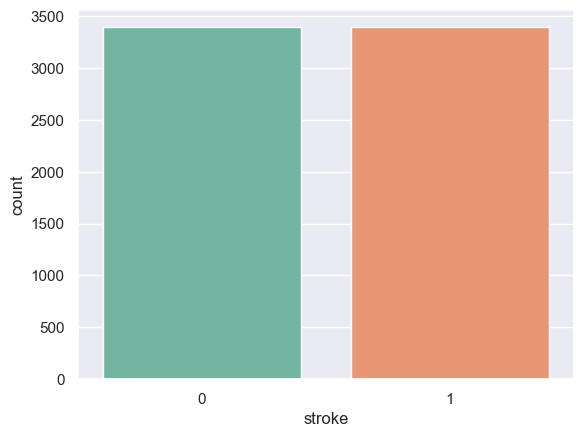

In [ ]:
# Menampilkan visualisasi data pada y_train setelah balancing
sns.countplot(x = y_train_resampled, palette=colors)
print('Stroke: ', sum(y_train_resampled == 1))
print('No stroke: ', sum(y_train_resampled == 0))

**Penjelasan:**

Berdasarkan visualisai distrbusi penyakit stroke setelah dilakukan balancing, diketahui bahwa distribusi kelas antara stroke maupun tidak stroke sudah seimbang. 



In [ ]:
# Membagi variabel baru menjadi data kategorik dan numerik seteah balancing
x_train_cat_selc_resampled = x_train_resampled[selected_cat_col]
x_train_num_selc_resampled = x_train_resampled[selected_num_col]


**Penjelasan:**

Kode tersebut bertujuan untuk memisahkan variabel baru yang telah di-resample menjadi dua bagian, yaitu data kategorikal dan numerik yang selanjutnya akan dilakukan prepocessing sesuai dengan jenis data. Melakukan encoding pada data kategorikal dan scaling pada data numerik.

### ***5.4.4 Scaling***

In [ ]:
# Inisialisasi Scaler
scaler = RobustScaler()

scaler

RobustScaler()

**Penjelasan:**

Pemilihan metode Robust Scaler karena beberapa kolom memiliki skewness yang cukup tinggi. Skewness yang tinggi menunjukkan bahwa distribusi data cenderung condong ke satu sisi yang disebabkan oleh adanya outlier. Oleh karena itu, kami memutuskan menggunakan `RobustScaler` karena lebih tahan terhadap outlier dan cocok digunakan untuk data yang tidak berdistribusi normal. 


### ***5.4.5 Encoding***

In [ ]:
# Encoding dengan One-Hot Encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoder

OneHotEncoder(drop='first', sparse_output=False)

**Penjelasan:**

Proses encoding dilakukan dengan `OneHot Encoding` karena fitur kategorikal tidak memiliki urutan atau katgorikal nominal. Metode ini nantinya akan memberikan nilai biner untuk setiap kategori dalam kolom kategorikal dan  menghasilkan kolom baru untuk setiap kategori.

#### Column Transformer

In [ ]:
# Inisialisasi Column Transformer
transformer = ColumnTransformer([
    ('scaler', scaler, selected_num_col),
    ('encoder', encoder, selected_cat_col),
], remainder='drop'
)

transformer

ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('encoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['ever_married'])])

**Penjelasan:**

ColumnTransformer digunakan untuk menggabungkan berbagai jenis preprocessing menjadi satu langkah yang efisien dan lebih terstruktur. Transformer terdiri dari 2 langkah, yaitu `proses scaling` untuk kolom numerik dan `proses encoding` untuk kolom kategorial dengan `parameter = drop` yang artinya bahwa kolom yang tidak diikutsertakan dalam ColumnTransformer akan di hapus. 


# **6. Model Definition**  
- Model Definition merupakan proses pemilihan jenis model yang tepat dan mengkonfigurasikan dengan parameter yang diperlukan.
- Projek ini akan menguji 5 algoritma model klasifikasi dengan pipeline sebagai berikut:

    1. K-Nearest Neighbor (KNN) Classifier
    
    2. Support Vector Machines (SVM)
    3. Decision Tree Classifier
    4. Random Forest Classifier
    5. XGB Classifier

## **6.1 K-Nearest Neighbor (KNN) Classifier Pipeline**


In [ ]:
# Menentukan Model KNN
model_knn = KNeighborsClassifier()

# Mendefinisikan Model Pipeline
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', model_knn)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('knn_class', KNeighborsClassifier())])

**Penjelasan**

Kode tersebut mendefinisikan model klasifikasi KNN (K-Nearest Neighbors) dalam pipeline dengan transformer preprocessing. Model K-Nearest Neighbors (KNN) pada prinsipnya mengklasifikasikan data baru ke kelas tertentu berdasarkan jarak data baru tersebut dengan k data terdekat.

**Kelebihan:**
- Mudah dipahami dan diimplementasikan
- Cocok untuk data non linear
- Tidak memerlukan asumsi tentang distribusi data

**Kekurangan:**
- Sensitif terhadap Fitur yang tidak relevan
- Mahal secara komputasi



## **6.2 Support Vector Machines (SVM) Pipeline**


In [ ]:
# Menentukan Model SVM
model_svc = SVC(probability=True)

# Mendefinisikan Model Pipeline
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', model_svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('svc', SVC(probability=True))])

**Penjelasan**

Kode tersebut mendefinisikan model klasifikasi SVC dalam pipeline dengan transformer preprocessing. Model SVM Classifier merupakan algoritma klasifikasi yang bekerja dengan mencari hyperplane terbaik yang memisahkan data menjadi dua kelas
atau lebih.

**Kelebihan:**
- Efektif untuk dimensi tinggi dan dapat bekerja dengan opitmal pada dataset dengan banyak fitur
- Fleksibel dengan berbagai pilihan kernel untuk menangani data yang tidak dapat dipisahkan secara linear
- Mencegah risiko overfitting dengan mengatur margin

**Kekurangan:**
- Biaya komputasi yang mahal sehingga kurang efisien untuk dataset yang sangat besar
- Memerlukan pemilihan Hyperparamater yang cermat untuk mendapatkan kinerja terbaik


## **6.3 Decision Tree Classifier Pipeline**


In [ ]:
# Menentukan Model Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Mendefinisikan Model Pipeline
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', model_dt)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('dt_class', DecisionTreeClassifier())])

**Penjelasan**

Kode tersebut mendefinisikan model klasifikasi decision tree dalam pipeline dengan transformer preprocessing. Model decision tree menggunakan struktur pohon untuk membuat keputusan berdasarkan pada fitur dan kondisi yang dipilih untuk memecah dataset menjadi kelas yang berbeda. Setiap node dalam pohon mewakili sebuah fitur, setiap cabang mewakili sebuah keputusan berdasarkan fitur tersebut, dan setiap daun mewakili hasil atau label kelas.

**Kelebihan:**
- Mudah dipahami dan diimplementasikan
- Dapat menangani fitur numerik dan kategorikal
- Relatif cepat dan efisien untuk data train dan test

**Kekurangan:**
- Rentan terhadap resiko overfitting pada data pelatihan jika pohon terlalu dalam
- Sensitif terhadap perubahan data, seperti perubahaan kecil dalam data dapat menyebabkan perubahan besar dalam struktur pohon

## **6.4 Random Forest Classifier Pipeline**


In [ ]:
# Menentukan Model Random Forest
model_rf = RandomForestClassifier()

# Mendefinisikan Model Pipeline
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', model_rf)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('rf_class', RandomForestClassifier())])

**Penjelasan**

Kode tersebut mendefinisikan model klasifikasi Random Forest dalam pipeline dengan transformer preprocessing. Model Random Forest adalah model klasifikasi dengan menggabungkan kekuatan beberapa Decision Trees untuk menghasilkan prediksi yang lebih baik berdasarkan mayoritas prediksi dari pohon-pohon tersebut (voting).

**Kelebihan:**
- Dapat menangani fitur numerik dan kategorikal
- Mencegah risiko overfitting dnegan cara menggabungkan prediksi dari banyak pohon
- Lebih tahan terhadap noise dan outlier dalam dataset

**Kekurangan:**
- Memerlukan lebih banyak waktu pelatihan
- Sulit diinterpretasi hasil random forest dibandingkan decision tree
- Memerlukan waktu yang lebih lama pada data pelatihan karena melatih banyak pohon keputusan 



## **6.5 Boosting Algorithm (XGB Classifier) Pipeline**


In [ ]:
# Menentukan Model XGB classifier
model_xgb = XGBClassifier()

# Mendefinisikan Model Pipeline
xgb_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_class', model_xgb)
])

xgb_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Penjelasan**

Kode tersebut mendefinisikan algorima boosting, yaitu XGBoost dalam pipeline dengan transformer preprocessing. XGBoost (Extreme Gradient Boosting) merupakan salah satu algoritma boosting yang paling popular dan implementasi yang lebih cepat serta efisien dibandingkan algoritma gradient boosting. Boosting sendiri merupakan teknik ensemble yang menggabungkan beberapa model lemah  untuk membentuk model yang kuat.

**Kelebihan:**
- Memberikan informasi penting tentang fitur yang paling berkontribusi pada prediksi yang berguna untuk interpretasi model
- Meningkatkan akurasi yang signifikan dibandingkan model tunggal atau model ensamble lainnya

**Kekurangan:**
- Sangat kompleks dan membutuhkan waktu yang lama karena banyaknya hyperparamater yang digunakan
- Biaya Komputasi yang mahal




# **7. Model Training**
- `Model Training` berguna untuk model dapat belajar dari data yang diberikan untuk memberikan prediksi atau output yang akurat ketika diberikan pada data baru yang belum pernah dilihat sebelumnya. 

## **7.1 K-Nearest Neighbor (KNN) Classifier Pipeline**


In [ ]:
# Training model KNN dengan data latih yang sudah di balancing
knn_class_pipe.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('knn_class', KNeighborsClassifier())])

**Penjelasan**  

Kode tersebut digunakan untuk melatih atau menyesuaikan model KNN ke data pelatihan `(x_train_resampled dan y_train_resampled)` 

## **7.2 Support Vector Machines (SVM) Pipeline**


In [ ]:
# Training model SVC dengan data latih yang sudah di balancing
svc_pipe.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('svc', SVC(probability=True))])

**Penjelasan**  

Kode tersebut digunakan untuk melatih atau menyesuaikan model SVM ke data pelatihan `(x_train_resampled dan y_train_resampled)` 

## **7.3 Decision Tree Classifier Pipeline**


In [ ]:
# Training model Decision Tree Classifier dengan data latih yang sudah di balancing
dt_class_pipe.fit(x_train_resampled, y_train_resampled)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('dt_class', DecisionTreeClassifier())])

**Penjelasan**  

Kode tersebut digunakan untuk melatih atau menyesuaikan model decision tree classifier ke data pelatihan `(x_train_resampled dan y_train_resampled)` 

## **7.4 Random Forest Classifier Pipeline**


In [ ]:
# Training model Random Forest Classifier dengan data latih yang sudah di balancing
rf_class_pipe.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('rf_class', RandomForestClassifier())])

**Penjelasan**  

Kode tersebut digunakan untuk melatih atau menyesuaikan model random forest classifier ke data pelatihan `(x_train_resampled dan y_train_resampled)` 

## **7.5 Boosting Algorithm (XGB Classifier) Pipeline**


In [ ]:
# Training model XGB Classifier dengan data latih yang sudah di balancing
xgb_class_pipe.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ever_married'])])),
                ('xgb_class',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Penjelasan**  

Kode tersebut digunakan untuk melatih atau menyesuaikan model XGBoost Classifier ke data pelatihan `(x_train_resampled dan y_train_resampled)` 

# **8. Model Evaluation**
- `Model Evaluasi` berguna untuk mengukur kinerja model yang telah dibangun dan memahami seberapa baik model dapat melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya. 

#### **Metrik yang digunakan - F1 score dan ROC-AUC**

- Untuk projek ini, kami bertujuan untuk memprediksi pasien mengalami penyakit stroke, dimana nilai 0 menandakan pasien tidak mengalami stroke sedangkan nilai 1 pasien mengalami stroke. Oleh karena itu, ada beberapa metrik utama untuk evaluasi pemodelan antara lain, `F1 score dan ROC-AUC`. Pemilihan metrik evaluasi harus dilakukan dengan tepat karena keseimbangan antara _false positives_ (positif palsu) dan _false negatives_ (negatif palsu) bisa sangat krusial dalam bidang kesehatan. Berikut alasan metrik evaluasi yang digunakan:

    - Recall (Sensitivity) : Dalam memprediksi apakah pasien menderita stroke atau tidak, recall biasanya menjadi fokus utama karena ingin meminimalkan _false negatives_. Hal ini untuk mendeteksi sebanyak mungkin pasien yang benar menderita stroke untuk mendapatkan perawatan yang tepat waktu dan optimal.

    - Precision: Metrik ini menunjukkan seberapa banyak dari semua pasien yang diprediksi menderita stroke adalah yang benar-benar stroke. Metrik ini memastikan bahwa peringatan tentang kemungkinan stroke benar-benar akurat dan mengurangi alarm palsu. Hal ini akan memungkinkan dokter untuk memberikan keputusan pengobatan yang lebih tepat dan mengurangi biaya pengobatan yang tidak perlu yang harus dikeluarkan oleh pasien. 
    - F1 score: Menyeimbangkan hasil dari recall dan precision yang memastikan bahwa model tidak hanya mendeteksi sebanyak mungkin penderita stroke tetapi juga memberikan prediksi yang akurat, yang sangat penting dalam konteks medis untuk memastikan perawatan yang tepat dan mengurangi jumlah alarm palsu.
    - ROC-AUC: Memberikan gambaran tentang kemampuan model dalam membedakan antara pasien yang menderita stroke dan yang tidak

#### *a. Train & Test Score*

In [ ]:
def train_test_score(modelName, model, isTuned=False):
 
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print(f'Tuned {modelName} Model Score')
        # Example: Best hyperparameters for svc
        if hasattr(model, 'best_params_'):
            best_params = model.best_params_
            print(f'Best params for {modelName}: {best_params}')

    train_score = round(model.score(x_train_resampled, y_train_resampled), 4)
    test_score = round(model.score(x_test_combined, y_test), 4)
    print('Training Score:', train_score)
    print('Testing Score:', test_score)




**Penjelasan:**  

Kode tersebut membuat fungsi yang digunakan untuk mengetahui seberapa baik kinerja model machine learning pada data pelatihan dan pengujian. Ini menghitung skor berdasarkan seberapa akurat model memprediksi hasil dari data pelatihan dan pengujian, lalu mencetak skor tersebut.

#### *b. Metric Score*

In [ ]:
def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Compute precision, recall, and F1 scores for training and testing sets
    precision_train = precision_score(y_train_resampled, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train_resampled, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train_resampled, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    print('Precision')
    print('Train Set:', precision_train)
    print('Test Set:', precision_test, '\n')
    
    print('Recall')
    print('Train Set:', recall_train)
    print('Test Set:', recall_test, '\n')
    
    print('F1 Score')
    print('Train Set:', f1_train)
    print('Test Set:', f1_test, '\n')

    return precision_train, precision_test, recall_train, recall_test, f1_train, f1_test


**Penjelasan**  

Kode tersebut membuat fungsi yang digunakan untuk menampilkan tiga metrik penting: presisi, recall, dan skor F1 baik untuk set data latih maupun data uji. Secara keseluruhan, fungsi ini berguna untuk mengukur performa model klasifikasi dengan cepat.


#### *c. Cross Validation*

In [ ]:
# Function to display the cross validation score 

def cross_validation_f1_score(modelName, model, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # Define the F1 score scorer
    f1_scorer = make_scorer(f1_score)

    # Perform cross-validation
    cv_scores_f1 = cross_val_score(model, x_train_resampled, y_train_resampled, scoring=f1_scorer, cv=5)

    # Display the results
    print('F1 Score')
    print(f'F1 Score - All - Cross Validation: {cv_scores_f1}')
    print(f'F1 Score - Mean - Cross Validation: {cv_scores_f1.mean()}')
    print(f'F1 Score - Std - Cross Validation: {cv_scores_f1.std()}')



**Penjelasan**  

Kode tersebut digunakan untuk membuat fungsi yang berguna untuk mengevaluasi performa model menggunakan cross validation. Secara khusus hanya berfokus pada F1 Score yang menampilkan nilai rata-rata serta standar deviasi. Secara keseluruhan, fungsi ini untuk memahami seberapa baik model menggeneralisasi data baru dan seberapa konsisten performanya di berbagai subsets data pelatihan.



#### *d. Grafik ROC - AUC*

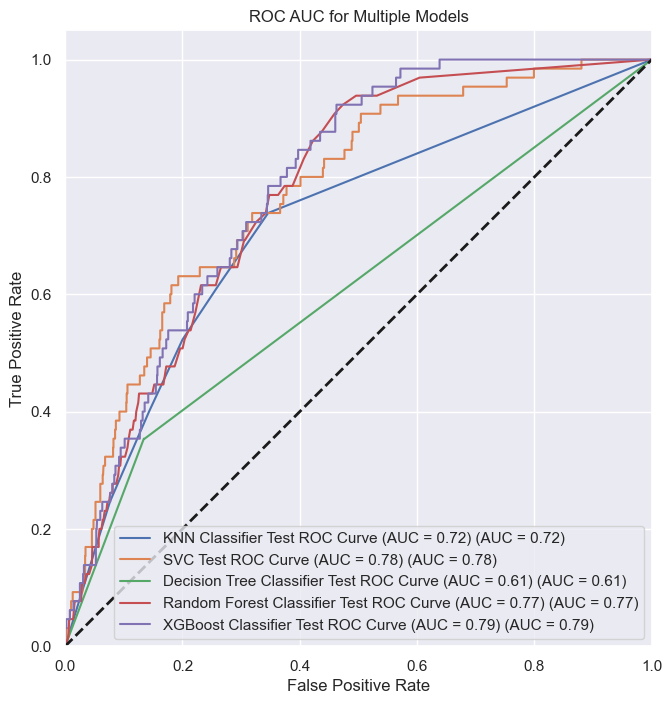

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def plot_roc_auc(models, x_train, y_train, x_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)
        
        # Predict probabilities
        y_train_proba = model.predict_proba(x_train)[:, 1]
        y_test_proba = model.predict_proba(x_test)[:, 1]
        
        # Compute ROC curve and ROC AUC for train set
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        roc_auc_train = auc(fpr_train, tpr_train)
        
        # Compute ROC curve and ROC AUC for test set
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)
        
        # Plot ROC curve for test set
        RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test, estimator_name=f'{model_name} Test ROC Curve (AUC = {roc_auc_test:.2f})').plot(ax=plt.gca())
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC for Multiple Models')
    plt.legend(loc="lower right")
    plt.show()

# Define the models
models = {
    'KNN Classifier': knn_class_pipe,
    'SVC': svc_pipe,
    'Decision Tree Classifier': dt_class_pipe,
    'Random Forest Classifier': rf_class_pipe,
    'XGBoost Classifier': xgb_class_pipe
}

# Call the function with the defined models
plot_roc_auc(models, x_train_resampled, y_train_resampled, x_test_combined, y_test)


**Penjelasan:**

Grafik ROC AUC di atas menunjukkan performa lima model klasifikasi dalam membedakan antara pasien yang mengalami stroke dan yang tidak. 

1. *KNN Classifier (AUC = 0.72)*:
   - Kurva ROC berada di atas garis diagonal dengan AUC 0.72, menunjukkan model ini lebih baik daripada prediksi.

2. *SVC (AUC = 0.78)*:
   - Kurva ROC cukup jauh di atas garis diagonal dengan AUC 0.78, menunjukkan model ini cukup baik dalam membedakan pasien yang mengalami stroke dan yang tidak.

3. *Decision Tree Classifier (AUC = 0.61)*:
   - Kurva ROC sedikit di atas garis diagonal dengan AUC 0.61, menunjukkan model ini lebih baik dari prediksi tetapi tidak sebaik model lainnya.
   - Model ini memiliki performa paling rendah dalam kelompok ini.

4. *Random Forest Classifier (AUC = 0.77)*:
   - Kurva ROC menunjukkan AUC 0.77, menunjukkan performa yang baik dalam membedakan antara pasien stroke dan non-stroke.
   - Ini merupakan model dengan performa yang cukup baik, mendekati SVC.

5. *XGBoost Classifier (AUC = 0.79)*:
   - Kurva ROC tertinggi dengan AUC 0.79, menunjukkan model ini memiliki performa terbaik di antara semua model yang diuji.
   - Model ini paling efektif dalam membedakan pasien yang mengalami stroke dan yang tidak.


## **8.1 K-Nearest Neighbor (KNN) Classifier**


#### *a. KNN Train & Test Score*

In [ ]:
# Skor untuk data pelatihan dan data uji pada model KNN
train_test_score("KNN Classifier", knn_class_pipe)

KNN Classifier Base Model Score
Training Score: 0.907
Testing Score: 0.788


**Penjelasan:**

Model KNN klasifikasi menunjukkan kinerja yang baik pada data training dengan skor yaitu 0.907 yang artinya model dapat mengklasifikasikan `90.7% dari data latih` dengan benar. Skor pada data testing lebih rendah dibandingkan data training yaitu 0.788 yang artinya model dapat mengklasifikasikan `78.8% dari data uji` dengan benar. Hal ini menunjukkan ada sedikit `overfitting` karena terdapat sedikit penurunan performa dari data pelatihan ke data uji.




#### *b. KNN Metric Score*

In [ ]:
# Prediksi Model
y_knn_class_train_pred = knn_class_pipe.predict(x_train_resampled)
y_knn_class_test_pred = knn_class_pipe.predict(x_test_combined)

In [ ]:
# Skor Metrik
knn_class_precision_train, knn_class_precision_test, knn_class_recall_train, knn_class_recall_test, knn_class_f1_train, knn_class_f1_test = metrics_score ('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Precision
Train Set: 0.8664719936288824
Test Set: 0.10365853658536585 

Recall
Train Set: 0.9622641509433962
Test Set: 0.5230769230769231 

F1 Score
Train Set: 0.9118591982120408
Test Set: 0.17302798982188294 



**Penjelasan:**

1. **Precision**: Model memiliki precision yang tinggi pada data pelatihan, artinya dari semua prediksi positif (prediksi bahwa 
pasien mengalami stroke) sebanyak 86.6% benar-benar positif sedangkan memiliki precision sangat rendah pada data uji, yaitu hanya 10.4% yang benar-benar postif yang menunjukkan bahwa model menghasilkan banyak false positives (banyak prediksi stroke yang salah).

2. **Recall**: Model memiliki recall yang sangat tinggi pada data pelatihan, artinya model mampu mengidentifikasi 96.2% dari semua kasus stroke yang sebenarnya, sedangkan memiliki recall sangat rendah pada data uji, yaitu model hanya mampu mengidentifikasi 52.3%  dari semua kasus stroke yang sebenarnya. Ini menunjukkan bahwa model kehilangan banyak kasus stroke pada data uji.

3. **F1 Score**: Model memiliki F1 score yang tinggi pada data pelatihan sebesar 0.912 yang menunjukkan keseimbangan yang baik antara  precision dan recall pada data latih sedangkan F1 score sangat rendah pada data uji sebesar 0.173 yang menunjukkan 
kinerja yang buruk dalam mengenali pola pada data baru.

   - Secata keseluruhan model ini menunjukkan overfitting yang signifikan, karena nilai `precision, recall, dan F1 Score` semuanya memiliki nilai yang tinggi pada data latih namun rendah pada data uji. Berdasarkan konteks medis, yaitu memprediksi seseorang mengalami stroke dapat menyebabkan kekhawatiran yang tidak perlu dan intervensi medis yang tidak diperlukan bagi pasien yang sebenarnya tidak mengalami stroke. Selain itu, nilai recall yang rendah akan membahayakan pasien yang sebenernya mengalami stroke mungkin tidak terdeteksi.





#### *c. KNN Confusion Matrix*

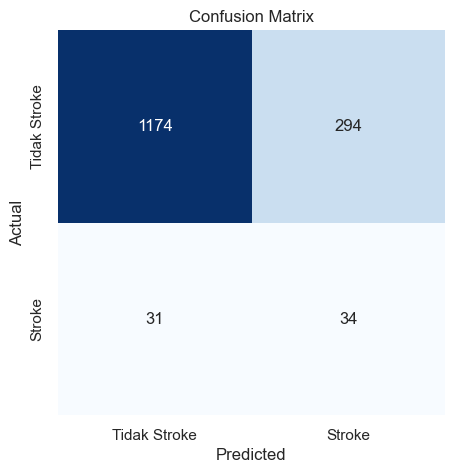

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_knn_class_test_pred)

# Menampilkan visualisasi data
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**

1. **True Positives (TP)**: Sejumlah 34 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1174 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 294 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 31 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


### *d. KNN Cross Validation Score*

In [ ]:
# Menampilkan nilai Cross Validation  
cross_validation_f1_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.8663401  0.88888889 0.87728814 0.87626775 0.8899654 ]
F1 Score - Mean - Cross Validation: 0.879750053771059
F1 Score - Std - Cross Validation: 0.008785055142740292


**Penjelasan:**

- **F1 Score - All - Cross Validation**: 
  - Hasil ini menunjukkan keseimbangan antara presisi dan recall untuk masing-masing dari lima lipatan yang digunakan dalam cross-validation.
  
- **F1 Score - Mean - Cross Validation**:
  - Nilai rata-rata F1 score dari kelima lipatan adalah 0.879750053771059.
  - Hasil rata-rata ini menunjukkan bahwa model memiliki kinerja yang optimal dalam menyeimbangkan antara presisi dan recall.

- **F1 Score - Std - Cross Validation**:
  - Standar deviasi dari F1 score adalah 0.008785055142740292.
  - Nilai standar deviasi yang kecil menunjukkan bahwa model KNN memiliki performa yang konsisten di berbagai subset data yang digunakan dalam cross-validation.


## **8.2 Support Vector Machines (SVM)**


#### *a. SVM Train & Test Score*

In [ ]:
# Skor untuk data pelatihan dan data uji pada model SVM
train_test_score('SVC Classifcation', svc_pipe)

SVC Classifcation Base Model Score
Training Score: 0.8125
Testing Score: 0.743


**Penjelasan:**

Model SVM menunjukkan kinerja yang baik pada data training dengan skor yaitu 0.812 yang artinya model dapat mengklasifikasikan `81.2% dari data latih` dengan benar. Skor pada data testing lebih rendah dibandingkan data training yaitu 0.743 yang artinya model dapat mengklasifikasikan `74.3% dari data uji` dengan benar. Hal ini menunjukkan ada sedikit `overfitting` karena terdapat sedikit penurunan performa dari data pelatihan ke data uji.

#### *b. SVM Metric Score*

In [ ]:
# Prediksi model
y_svc_train_pred = svc_pipe.predict(x_train_resampled)
y_svc_test_pred = svc_pipe.predict(x_test_combined)

In [ ]:
# Metric Score# Skor Metrik
svc_precision_train, svc_precision_test, svc_recall_train, svc_recall_test, svc_f1_train, svc_f1_test = metrics_score ('SVC Classification', y_svc_train_pred, y_svc_test_pred)

SVC Classification Base Model Score

Precision
Train Set: 0.7697201017811705
Test Set: 0.1016949152542373 

Recall
Train Set: 0.8918042452830188
Test Set: 0.6461538461538462 

F1 Score
Train Set: 0.826276973504507
Test Set: 0.17573221757322174 



**Penjelasan:**

1. **Precision**: Model memiliki precision yang tinggi pada data pelatihan, artinya dari semua prediksi positif (prediksi bahwa 
pasien mengalami stroke) sebanyak 76.9% benar-benar positif sedangkan memiliki precision sangat rendah pada data uji, yaitu hanya 10.2% yang benar-benar postif yang menunjukkan bahwa model menghasilkan banyak false positives (banyak prediksi stroke yang salah).

2. **Recall**: Model memiliki recall yang sangat tinggi pada data pelatihan, artinya model mampu mengidentifikasi 89.2% dari semua kasus stroke yang sebenarnya, sedangkan memiliki recall sangat rendah pada data uji, yaitu model hanya mampu mengidentifikasi 64.6%  dari semua kasus stroke yang sebenarnya. Ini menunjukkan bahwa model kehilangan banyak kasus stroke pada data uji.

3. **F1 Score**: Model memiliki F1 score yang tinggi pada data pelatihan sebesar 0.826 yang menunjukkan keseimbangan yang baik antara  precision dan recall pada data latih sedangkan F1 score sangat rendah pada data uji sebesar 0.176 yang menunjukkan 
kinerja yang buruk dalam mengenali pola pada data baru.

   - Secata keseluruhan model ini menunjukkan overfitting yang signifikan, karena nilai `precision, recall, dan F1 Score` semuanya memiliki nilai yang tinggi pada data latih namun rendah pada data uji. Berdasarkan konteks medis, yaitu memprediksi seseorang mengalami stroke dapat menyebabkan kekhawatiran yang tidak perlu dan intervensi medis yang tidak diperlukan bagi pasien yang sebenarnya tidak mengalami stroke. Selain itu, nilai recall yang rendah akan membahayakan pasien yang sebenernya mengalami stroke mungkin tidak terdeteksi.

#### *c. SVM Confusion Matrix*

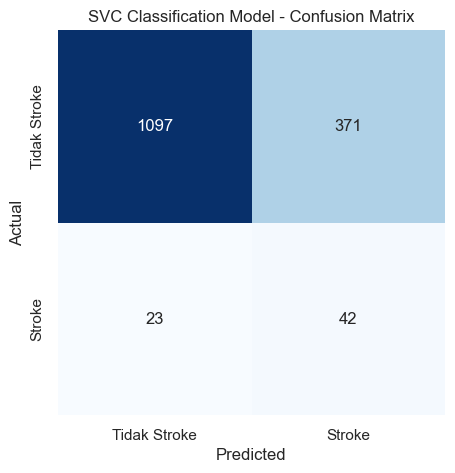

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_svc_test_pred)

# Menampilkan Visualisasi Data
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('SVC Classification Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**

1. **True Positives (TP)**: Sejumlah 42 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1097 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 371 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 23 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


### *d. SVM Cross Validation Score*

In [ ]:
# Menampilkan nilai Cross Validation 
cross_validation_f1_score('SVC Classification', svc_pipe)

SVC Classification Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.78406709 0.8244898  0.82591093 0.82870684 0.84296397]
F1 Score - Mean - Cross Validation: 0.8212277242640443
F1 Score - Std - Cross Validation: 0.019707298676608215


**Penjelasan**

- **F1 Score - All - Cross Validation**: 
  - Hasil ini menunjukkan keseimbangan antara presisi dan recall untuk masing-masing dari lima lipatan yang digunakan dalam cross-validation.
  
- **F1 Score - Mean - Cross Validation**:
  - Nilai rata-rata F1 score dari kelima lipatan adalah 0.8212277242640443.
  - Nilai Rata-rata F1 score menunjukkan bahwa model memiliki kinerja yang baik dalam menyeimbangkan antara presisi dan recall, meskipun tidak sebaik model KNN.

- **F1 Score - Std - Cross Validation**:
  - Standar deviasi dari F1 score adalah 0.019707298676608215.
  - Nilai standar deviasi yang relatif kecil menunjukkan bahwa model SVC memiliki performa yang cukup konsisten di berbagai subset data yang digunakan dalam cross-validation.



## **8.3 Decision Tree Classifier**


#### *a. Decision Tree Train & Test Score*

In [ ]:
# Skor untuk data pelatihan dan data uji pada model Decision tree
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score: 0.9985
Testing Score: 0.8441


**Penjelasan:**

Model Decision Tree Classifier menunjukkan kinerja yang baik pada data training dengan skor yaitu 0.998 yang artinya model dapat mengklasifikasikan `99.8% dari data latih` dengan benar. Skor pada data testing lebih rendah dibandingkan data training yaitu 0.842 yang artinya model dapat mengklasifikasikan `84.2% dari data uji` dengan benar. Hal ini menunjukkan ada sedikit `overfitting` karena terdapat sedikit penurunan performa dari data pelatihan ke data uji.

#### *b. Decision Tree Metric Score*

In [ ]:
# Prediksi model
y_dt_class_train_pred = dt_class_pipe.predict(x_train_resampled)
y_dt_class_test_pred = dt_class_pipe.predict(x_test_combined)

In [ ]:
# Skor Metrik
sdt_class_precision_train, dt_class_precision_test, dt_class_recall_train, dt_class_recall_test, dt_class_f1_train, dt_class_f1_test = metrics_score ('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Precision
Train Set: 0.9985259433962265
Test Set: 0.10454545454545454 

Recall
Train Set: 0.9985259433962265
Test Set: 0.35384615384615387 

F1 Score
Train Set: 0.9985259433962265
Test Set: 0.16140350877192983 



**Penjelasan:**

1. **Precision**: Model memiliki precision yang tinggi pada data pelatihan, artinya dari semua prediksi positif (prediksi bahwa 
pasien mengalami stroke) sebanyak 99.6% benar-benar positif sedangkan memiliki precision sangat rendah pada data uji, yaitu hanya 9.6% yang benar-benar postif yang menunjukkan bahwa model menghasilkan banyak false positives (banyak prediksi stroke yang salah).

2. **Recall**: Model memiliki recall yang sangat tinggi pada data pelatihan, artinya model mampu mengidentifikasi 99.9% dari semua kasus stroke yang sebenarnya, sedangkan memiliki recall sangat rendah pada data uji, yaitu model hanya mampu mengidentifikasi 32.3%  dari semua kasus stroke yang sebenarnya. Ini menunjukkan bahwa model kehilangan banyak kasus stroke pada data uji.

3. **F1 Score**: Model memiliki F1 score yang tinggi pada data pelatihan sebesar 0.998 yang menunjukkan keseimbangan yang baik antara  precision dan recall pada data latih sedangkan F1 score sangat rendah pada data uji sebesar 0.147 yang menunjukkan 
kinerja yang buruk dalam mengenali pola pada data baru.

   - Secata keseluruhan model ini menunjukkan overfitting yang signifikan, karena nilai `precision, recall, dan F1 Score` semuanya memiliki nilai yang tinggi pada data latih namun rendah pada data uji. Berdasarkan konteks medis, yaitu memprediksi seseorang mengalami stroke dapat menyebabkan kekhawatiran yang tidak perlu dan intervensi medis yang tidak diperlukan bagi pasien yang sebenarnya tidak mengalami stroke. Selain itu, nilai recall yang rendah akan membahayakan pasien yang sebenernya mengalami stroke mungkin tidak terdeteksi.

#### *c. Decision Tree Confusion Matrix*

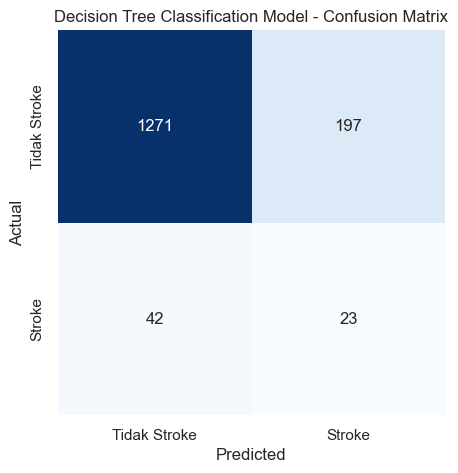

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_dt_class_test_pred)

# Menampilkan Visualisasi Data
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('Decision Tree Classification Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**

1. **True Positives (TP)**: Sejumlah 24 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1273 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 195 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 41 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


### *d. Decision Tree Cross Validation Score*

In [ ]:
# Display Cross Validation Score
cross_validation_f1_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.85952923 0.89244186 0.89275362 0.89971751 0.88985507]
F1 Score - Mean - Cross Validation: 0.8868594606694253
F1 Score - Std - Cross Validation: 0.014050970832247477


**Penjelasan**

- **F1 Score - All - Cross Validation**:
  - Hasil ini menunjukkan keseimbangan antara presisi dan recall untuk masing-masing dari lima lipatan yang digunakan dalam cross-validation.
  
- **F1 Score - Mean - Cross Validation**:
  - Nilai rata-rata F1 score dari kelima lipatan adalah 0.8858142416516508.
  - Nilai Rata-rata F1 score menunjukkan bahwa model memiliki kinerja yang sangat baik dalam menyeimbangkan antara presisi dan recall.

- **F1 Score - Std - Cross Validation**:
  - Standar deviasi dari F1 score adalah 0.012260809865067784.
  - Nilai standar deviasi yang relatif kecil menunjukkan bahwa model Decision Tree memiliki performa yang cukup konsisten di berbagai subset data yang digunakan dalam cross-validation.



Secara keseluruhan, hasil ini menunjukkan bahwa Decision Tree Classifier adalah model yang kuat dan konsisten untuk dataset yang digunakan, memberikan performa yang sangat baik dalam hal F1 score. Model ini cocok digunakan dalam skenario di mana keseimbangan antara presisi dan recall sangat penting.



## **8.4 Random Forest Classifier**


#### *a. Random Forest Train & Test Score*

In [ ]:
# Skor untuk data pelatihan dan data uji pada model Random Forest
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score
Training Score: 0.9985
Testing Score: 0.8584


**Penjelasan:**

Model Random Forest Classifier menunjukkan kinerja yang baik pada data training dengan skor yaitu 0.998 yang artinya model dapat mengklasifikasikan `99.8% dari data latih` dengan benar. Skor pada data testing lebih rendah dibandingkan data training yaitu 0.865 yang artinya model dapat mengklasifikasikan `86.5% dari data uji` dengan benar. Hal ini menunjukkan ada sedikit `overfitting` karena terdapat sedikit penurunan performa dari data pelatihan ke data uji.

#### *b. Random Forest Metric Score*

In [ ]:
# Prediksi Model
y_rf_class_train_pred = rf_class_pipe.predict(x_train_resampled)
y_rf_class_test_pred = rf_class_pipe.predict(x_test_combined)

In [ ]:
# Skor Metrik
rf_class_precision_train, rf_class_precision_test, rf_class_recall_train, rf_class_recall_test, rf_class_f1_train, rf_class_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Precision
Train Set: 0.9976456739258387
Test Set: 0.12745098039215685 

Recall
Train Set: 0.9994103773584906
Test Set: 0.4 

F1 Score
Train Set: 0.9985272459499264
Test Set: 0.19330855018587362 



**Penjelasan:**

1. **Precision**: Model memiliki precision yang tinggi pada data pelatihan, artinya dari semua prediksi positif (prediksi bahwa 
pasien mengalami stroke) sebanyak 99.7% benar-benar positif sedangkan memiliki precision sangat rendah pada data uji, yaitu hanya 1.4% yang benar-benar postif yang menunjukkan bahwa model menghasilkan banyak false positives (banyak prediksi stroke yang salah).

2. **Recall**: Model memiliki recall yang sangat tinggi pada data pelatihan, artinya model mampu mengidentifikasi 99.9% dari semua kasus stroke yang sebenarnya, sedangkan memiliki recall sangat rendah pada data uji, yaitu model hanya mampu mengidentifikasi 43%  dari semua kasus stroke yang sebenarnya. Ini menunjukkan bahwa model kehilangan banyak kasus stroke pada data uji.

3. **F1 Score**: Model memiliki F1 score yang tinggi pada data pelatihan sebesar 0.998 yang menunjukkan keseimbangan yang baik antara  precision dan recall pada data latih sedangkan F1 score sangat rendah pada data uji sebesar 0.212 yang menunjukkan 
kinerja yang buruk dalam mengenali pola pada data baru.

   - Secata keseluruhan model ini menunjukkan overfitting yang signifikan, karena nilai `precision, recall, dan F1 Score` semuanya memiliki nilai yang tinggi pada data latih namun rendah pada data uji. Berdasarkan konteks medis, yaitu memprediksi seseorang mengalami stroke dapat menyebabkan kekhawatiran yang tidak perlu dan intervensi medis yang tidak diperlukan bagi pasien yang sebenarnya tidak mengalami stroke. Selain itu, nilai recall yang rendah akan membahayakan pasien yang sebenernya mengalami stroke mungkin tidak terdeteksi.

#### *c. Random Forest Confusion Matrix*

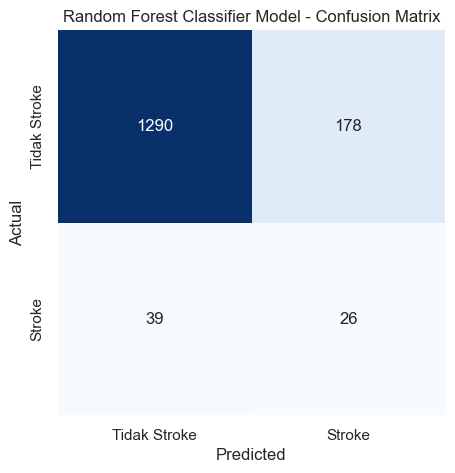

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_rf_class_test_pred)

# Visualisasi Data
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**

1. **True Positives (TP)**: Sejumlah 27 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1290 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 178 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 38 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


### *d. Random Forest Cross Validation Score*

In [ ]:
# Menampilkan Skor Cross Validation 
cross_validation_f1_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.88178439 0.92637598 0.91822095 0.91544375 0.9194583 ]
F1 Score - Mean - Cross Validation: 0.9122566731289667
F1 Score - Std - Cross Validation: 0.015655725003991844


**Penjelasan**

- **F1 Score - All - Cross Validation**:
  - Hasil ini menunjukkan keseimbangan antara presisi dan recall untuk masing-masing dari lima lipatan yang digunakan dalam cross-validation.

- **F1 Score - Mean - Cross Validation**:
  - Nilai rata-rata F1 score dari kelima lipatan adalah 0.9137485172880577.
  - Nilai Rata-rata F1 score menunjukkan bahwa model memiliki kinerja yang luar biasa dalam menyeimbangkan antara presisi dan recall.

- **F1 Score - Std - Cross Validation**:
  - Standar deviasi dari F1 score adalah 0.015640690884475776.
  - Nilai standar deviasi yang relatif kecil menunjukkan bahwa model Random Forest memiliki performa yang cukup konsisten di berbagai subset data yang digunakan dalam cross-validation.


Secara keseluruhan, hasil ini menunjukkan bahwa Random Forest Classifier adalah model yang sangat kuat dan konsisten untuk dataset yang digunakan, memberikan performa yang luar biasa dalam hal F1 score. Model ini sangat cocok digunakan dalam skenario di mana keseimbangan antara presisi dan recall sangat penting.


## **8.5 Boosting Algorithm (XGB Classifier)**


#### *a. XGB Train & Test Score*

In [ ]:
# Skor untuk data pelatihan dan data uji pada model XGB Classifier
train_test_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Score
Training Score: 0.9682
Testing Score: 0.8454


**Penjelasan**

Model XGBoost Classifier menunjukkan kinerja yang baik pada data training dengan skor yaitu 0.968 yang artinya model dapat mengklasifikasikan `96.8% dari data latih` dengan benar. Skor pada data testing lebih rendah dibandingkan data training yaitu 0.845 yang artinya model dapat mengklasifikasikan `84.5% dari data uji` dengan benar. Hal ini menunjukkan ada sedikit `overfitting` karena terdapat sedikit penurunan performa dari data pelatihan ke data uji.

#### *b. XGB Metric Score*

In [ ]:
# Prediksi Model
y_xgb_class_train_pred = xgb_class_pipe.predict(x_train_resampled)
y_xgb_class_test_pred = xgb_class_pipe.predict(x_test_combined)

**Penjelasan**



In [ ]:
# Skor Metrik
xgb_class_precision_train, xgb_class_precision_test, xgb_class_recall_train, xgb_class_recall_test, xgb_class_f1_train, xgb_class_f1_test = metrics_score ('XGBClassifier', y_xgb_class_train_pred, y_xgb_class_test_pred)

XGBClassifier Base Model Score

Precision
Train Set: 0.946067415730337
Test Set: 0.11946902654867257 

Recall
Train Set: 0.9929245283018868
Test Set: 0.4153846153846154 

F1 Score
Train Set: 0.9689298043728424
Test Set: 0.18556701030927836 



**Penjelasan:**

1. **Precision**: Model memiliki precision yang tinggi pada data pelatihan, artinya dari semua prediksi positif (prediksi bahwa 
pasien mengalami stroke) sebanyak 94.6% benar-benar positif sedangkan memiliki precision sangat rendah pada data uji, yaitu hanya 1.2% yang benar-benar postif yang menunjukkan bahwa model menghasilkan banyak false positives (banyak prediksi stroke yang salah).

2. **Recall**: Model memiliki recall yang sangat tinggi pada data pelatihan, artinya model mampu mengidentifikasi 99.3% dari semua kasus stroke yang sebenarnya, sedangkan memiliki recall sangat rendah pada data uji, yaitu model hanya mampu mengidentifikasi 42%  dari semua kasus stroke yang sebenarnya. Ini menunjukkan bahwa model kehilangan banyak kasus stroke pada data uji.

3. **F1 Score**: Model memiliki F1 score yang tinggi pada data pelatihan sebesar 0.968 yang menunjukkan keseimbangan yang baik antara  precision dan recall pada data latih sedangkan F1 score sangat rendah pada data uji sebesar 0.185 yang menunjukkan 
kinerja yang buruk dalam mengenali pola pada data baru.

   - Secata keseluruhan model ini menunjukkan overfitting yang signifikan, karena nilai `precision, recall, dan F1 Score` semuanya memiliki nilai yang tinggi pada data latih namun rendah pada data uji. Berdasarkan konteks medis, yaitu memprediksi seseorang mengalami stroke dapat menyebabkan kekhawatiran yang tidak perlu dan intervensi medis yang tidak diperlukan bagi pasien yang sebenarnya tidak mengalami stroke. Selain itu, nilai recall yang rendah akan membahayakan pasien yang sebenernya mengalami stroke mungkin tidak terdeteksi.

**Penjelasan**



#### *c. XGB Confusion Matrix*

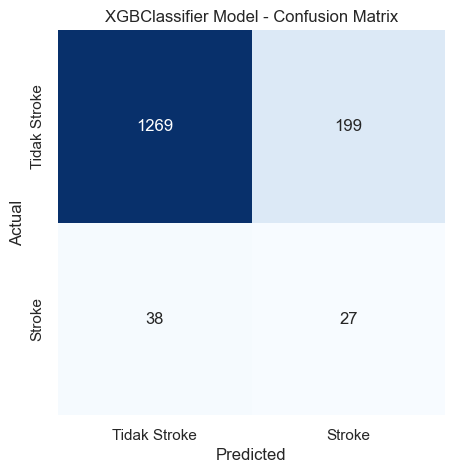

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_class_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**

1. **True Positives (TP)**: Sejumlah 27 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1269 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 199 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 38 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


**Penjelasan**



### *d. XGB Cross Validation Score*

In [ ]:
# Menampilkan Skor Cross Validation
cross_validation_f1_score('XGBClassifier', xgb_class_pipe)

XGBClassifier Base Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.88823529 0.9167842  0.91257996 0.89573128 0.92209632]
F1 Score - Mean - Cross Validation: 0.9070854104945909
F1 Score - Std - Cross Validation: 0.012913768609786522


**Penjelasan**

- **F1 Score - All - Cross Validation**:
  - Hasil ini menunjukkan keseimbangan antara presisi dan recall untuk masing-masing dari lima lipatan yang digunakan dalam cross-validation.

- **F1 Score - Mean - Cross Validation**:
    - Nilai rata-rata F1 score dari kelima lipatan adalah 0.9070854104945909.
    - Nilai Rata-rata F1 score menunjukkan bahwa model memiliki kinerja yang baik dalam menyeimbangkan antara presisi dan recall.

- **F1 Score - Std - Cross Validation**: 
  - Standar deviasi dari F1 score adalah 0.012913768609786522.
  - Nilai standar deviasi yang relatif kecil menunjukkan bahwa model XGBoost memiliki performa yang cukup konsisten di berbagai subset data yang digunakan dalam cross-validation.




## **8.6 Best Base Model Selection**



Dari kelima model dasar yang telah di evaluasi, maka dilakukan pemilihan model terbaik untuk dilakukan hyperparameter tuning untuk meningkatkan kinerja model pada data uji. Berikut ringkasan semua kinerja dari 5 model yang telah di evaluasi: 




| Base Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score Test | Cros Validation F1 Score Mean | 
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.907 | 0.788 |0.866 | 0.103 | 0.962 | 0.523 | 0.911 | 0.173 | 0.879| 
| SVC | 0.812 | 0.743 | 0.769 | 0.101 | 0.891 | 0.646 | 0.826 | 0.175 | 0.821 |   
| Decision Tree Classifier | 0.998 | 0.836 | 0.998 | 0.088 |0.998 | 0.307 | 0.998 |0.137 |0.884 |  
| Random Forest Classifier | 0.998 |0.859 | 0.997 | 0.131 |0.999| 0.415 |0.998 |0.2 | 0.910 |  
| XGBClassifier | 0.968 | 0.845 | 0.946 | 0.119 | 0.992 | 0.415 | 0.968 | 0.185 | 0.907 |  


**Penjelasan:**

Berdasarkan Ringkasan Evaluasi dari 5 kinerja model yang telah di evaluasi, dapat disimpulkan model terbaik untuk memprediksi sesorang mengalami stroke di Rumah Sakit A adalah model `Random Forest Classifier`. Berikut alasan memilih model ini sebagai berikut:

1. **Nilai Recall yang Tinggi**:
   - Memiliki nilai recall pada data uji sebesar 41.5%, yang lebih tinggi dibandingkan dengan model lainnya kecuali XGBoost yang memiliki nilai recall yang serupa(41.5%).
   
   - Di bidang kesehatan seperti prediksi stroke, recall yang tinggi sangat penting karena mengurangi kemungkinan _false negatives (FN)_, yang berarti lebih sedikit kasus stroke yang tidak terdeteksi. Hal ini penting untuk memberikan perawatan tepat waktu kepada pasien yang benar-benar membutuhkan.

2. **F1 Score**:
   - Memiliki nilai F1 Score pada data uji tertinggi yaitu sebesar 0.2 di dibandingkan nilai F1 Score di semua model pada data uji. F1 Score memberikan gambaran yang lebih seimbang tentang kinerja model secara keseluruhan.

3. **ROC AUC**:
   - Memiliki nilai ROC AUC pada data uji sebesar 0.77 lebih tinggi dibandingkan dengan model lainnya, yaitu KNN (0.72), SVC (0.78), dan Decision Tree (0.61) meskipun sedikit lebih rendah dibandingkan dengan XGBoost (0.79).
   
   - ROC AUC menunjukkan kemampuan model untuk membedakan antara pasien yang menderita stroke dan yang tidak dengan berbagai threshold. Nilai AUC yang lebih tinggi menunjukkan bahwa model lebih baik dalam memisahkan kelas positif dan negatif.

4. **Cross Validation F1 Score yang Konsisten**:
   - Memiliki nilai rata-rata cross validation tertinggi yaitu 0.910 diantara semua model yang di uji. Hal ini menunjukkan bahwa model random forest mempunyai kinerja yang konsisten dan stabil selama cross validation.



#### **8.7 Hyperparameter Tuning The Model**
- Hyperparameter tuning merupakan proses untuk meningkatkan kinerja dan generalisasi model serta mengurangi risiko overfitting ataupun underfitting dengan menemukan kombinasi paramter yang optimal pada model machine learning. Hyperparameter tuning digunakan untuk membuat model memprediksi data uji atau data baru yang belum pernah dilihat sebelumnya yang lebih akurat.



##### *Tuned Model Definition*

In [ ]:
# Mendefinisikan hyperparameter tunning 
rf_class_param_grid = {
    'rf_class__n_estimators': [200, 300],
    'rf_class__max_depth': [5, 7],
    'rf_class__min_samples_split': [3, 4, 5]
}

# Menggunakan GridSearch
rf_class_grid = GridSearchCV(rf_class_pipe, rf_class_param_grid, cv=5)

rf_class_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('encoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['ever_married'])])),
                                       ('rf_class', RandomForestClassifier())]),
             param_grid={'rf_class__max_depth': [5, 7],
                         'rf_class__min_samples_split': [3, 4, 5],
                         'rf_class__n_estimators': [200, 300]})

**Penjelasan**  

Kode tersebut digunakan untuk melakukan Hyperparameter Tunning untuk Random Forest Classifier. `rf_class_param_grid` berisi daftar nilai yang akan diuji untuk setiap hyperparameter dalam model. Metode yang digunakan adalah `Grid Search` yang bertujuan untuk mengoptimalkan kinerja model dengan memilih kombinasi hyperparameter yang menghasilkan hasil terbaik berdasarkan metrik evaluasi yang ditentukan.


##### *Tuned Model Training*

In [ ]:
# Pemodelan Hyperparameter Tuning dengan Grid Search
rf_class_grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('encoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['ever_married'])])),
                                       ('rf_class', RandomForestClassifier())]),
             param_grid={'rf_class__max_depth': [5, 7],
                         'rf_class__min_samples_split': [3, 4, 5],
                         'rf_class__n_estimators': [200, 300]})

**Penjelasan:**  

Kode tersebut digunakan untuk melatih model Random Forest Classifier menggunakan Grid Search dengan hyperparameter tuning.


##### *Tuned Model Train and Test Score*

In [ ]:
# Menampilkan skor pada data latih dan data uji
train_test_score('Random Forest Classifier', rf_class_grid, True)

Tuned Random Forest Classifier Model Score
Best params for Random Forest Classifier: {'rf_class__max_depth': 7, 'rf_class__min_samples_split': 3, 'rf_class__n_estimators': 300}
Training Score: 0.8594
Testing Score: 0.7717


**Penjelasan:**  

Kode tersebut untuk menampilkan skor pada data pelatihan dan data uji untuk model Random Forest Classifier yang sudah dilakukan hyperparameter tunning. Berdasarkan kode tersebut, diketahui bahwa:
- Parameter terbaik untuk model random forest classifer adalah sebagai berikut: 
    - `max_depth`: 7
    - `min_samples_split`: 3
    - `n_estimators`: 300
- Berdasarkan parameter tersebut, nilai data pelatihan sebesar 0.8585 dan nilai data uji  sebesar 0.775.\
- Nilai data uji yang sedikit lebih rendah menunjukkan adanya sedikit overfitting, di mana performa model sedikit lebih rendah saat diterapkan pada data yang belum pernah dilihat sebelumnya. Meskipun demikian, model masih dapat memberikan prediksi yang baik pada data uji.

##### *Tuned Model Metrics Score*

In [ ]:
# Predict using tuned model
y_rf_class_tuned_train_pred = rf_class_grid.predict(x_train_resampled)
y_rf_class_tuned_test_pred = rf_class_grid.predict(x_test_combined)

In [ ]:
# Metric Score
rf_class_tuned_precision_train, rf_class_tuned_precision_test, rf_class_tuned_recall_train, rf_class_tuned_recall_test, rf_class_tuned_f1_train, rf_class_tuned_f1_test = metrics_score ('Random Forest Classifier', y_rf_class_tuned_train_pred, y_rf_class_tuned_test_pred, True)

Random Forest Classifier Tuned Model Score

Precision
Train Set: 0.8087639311043566
Test Set: 0.1095890410958904 

Recall
Train Set: 0.9413325471698113
Test Set: 0.6153846153846154 

F1 Score
Train Set: 0.8700272479564033
Test Set: 0.18604651162790697 



**Penjelasan:** 

- Berdasarkan hasil hyperparameter tuning menggunakan Grid Search terjadi peningkatan pada performa model `random forest classfier` dibandingkan pada model dasar sebelum dilakukan hyperparameter tuning. 

    - Nilai precision pada data pelatihan sebesar 0.809 dan 0.110 pada data uji. Hal ini menunjukkan pada data pelatihan, model dapat mengidentifikasi dengan akurat sebagian besar kelas positif (pasien yang mengalami stroke). Namun, terjadi penurunan kemampuan model dalam mengidentifikasi kelas positif saat diterapkan pada data uji.

    - Nilai recall pada data pelatihan sebesar 0.928 dan 0.615 pada data uji. Hal ini menunjukkan pada data pelatihan bahwa model dapat mengidentifikasi dengan baik  pasien yang sebenarnya mengalami stroke. Namun, perlu diperhatikan bahwa skor recall pada data uji lebih rendah dari pada data pelatihan, yang menunjukkan adanya sedikit overfitting.

    - Nilai F1 Score pada data pelatihan sebesar 0.869 dan 0.188 pada data uji. Nilai F1 score pada data uji yang lebih rendah dibandingkan pada data pelatihan menunjukkan adanya sedikit overfitting dan penurunan performa saat diterapkan pada data baru.


##### *Tuned Model Confusion Matrix*

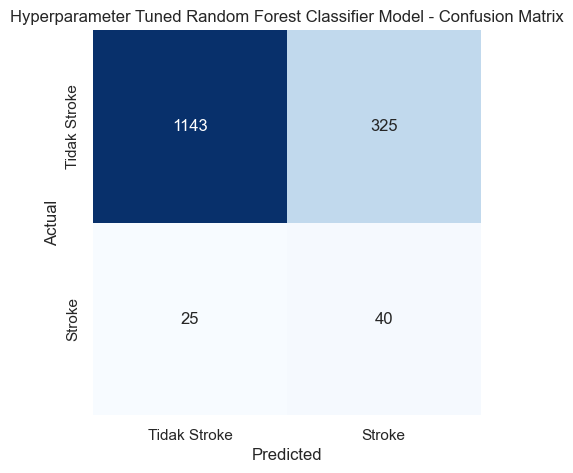

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_rf_class_tuned_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tidak Stroke', 'Stroke'], 
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title('Hyperparameter Tuned Random Forest Classifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Penjelasan:**  

Berdasarkan hasil hyperparameter tuning menggunakan Grid Search diketahui terjadi penurunan pada jumlah kasus di Recall atau False Negative dibandingkan pada model random forest sebelum dilakukan hyperparameter tuning.

1. **True Positives (TP)**: Sejumlah 40 kasus yang benar-benar mengalami stroke dan diprediksi mengalami stroke. 

2. **True Negatives (TN)**: Sejumlah 1147 kasus yang benar-benar tidak mengalami stroke dan diprediksi tidak mengalami stroke.

3. **False Positives (FP)**: Sejumlah 325 kasus yang sebenarnya tidak mengalami stroke namun diprediksi mengalami stroke _(False Alarm)_

4. **False Negatives (FN)**: Sejumlah 25 kasus yang benar-benar mengalami stroke namun diprediksi tidak mengalami stroke _(Missed)_


##### *Tuned Model Cross Validation Score*

In [ ]:
# Menampilkan Skor Cross Validation 
cross_validation_f1_score('Random Forest Classifier', rf_class_grid, True)

Random Forest Classifier Tuned Model Cross Validation Score

F1 Score
F1 Score - All - Cross Validation: [0.81507327 0.85926928 0.85906945 0.85465506 0.86434901]
F1 Score - Mean - Cross Validation: 0.8504832155998475
F1 Score - Std - Cross Validation: 0.01796912389322826


**Penjelasan:**  

- Hasil setiap lipatan data  menunjukkan konsistensi performa model. Skor F1 yang tinggi menunjukkan bahwa model dapat secara efektif menyeimbangkan antara precision dan recall.

- Hasil dari proses hyperparameter tuning menggunakan Grid Search pada model Random Forest Classifier menunjukkan peningkatan dalam performa model. Skor F1 rata-rata dari cross-validation adalah sekitar 0.850, dengan standar deviasi sekitar 0.018. Hal ini menunjukkan bahwa model yang telah disesuaikan dapat secara konsisten memberikan prediksi yang baik dan stabil di berbagai liputan data.


## **8.8 Best Base Model vs Tuned Model Selection**


Berdasarkan model dasar terbaik dan model yang telah dilakukan hyperparameter, berikut ringkasan dari dua kinerja model yang telah dievaluasi, sebagai berikut: 

| Base & Tuned Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score Test| Cross Validation F1 Mean |
|---|---|---|---|---|---|---|---|---|---|
| Random Forest Classifier | 0.998 |0.859 | 0.997 | 0.131 |0.999| 0.415 |0.998 |0.2 | 0.910 | 
| Hyperparameter Tuned Random Forest Classifier | 0.858 |0.775 | 0.810 | 0.110 | 0.939 | 0.615| 0.869 | 0.187 | 0.849 |


**Penjelasan**

**1. Base Model Random Forest Classifier:**
- Model ini menunjukkan performa yang tinggi pada pelatihan yang hampir sempurna (0.998), namun kemungkinan adanya overfitting dan terjadi penururunan performa pada data uji meskipun  model cukup mampu memprediksi data yang tidak terlihat (0.859)

- Nilai precision pada data pelatihan memiliki nilai yang sangat tinggi yang artinya sebagian besar prediksi stroke pada data pelatihan adalah benar. Namun nilai presisi pada data uji sangat rendah, menunjukkan banyak prediksi stroke yang salah pada data uji.

- Nilai recall pada data pelatihan hampir sempurna dalam mendeteksi kasus stroke namun pada data uji nilai recall cukup rendah yang menunjukkan banyak nya kasus stroke yang terlewat.

- Nilai F1 Score digunakan untuk menyeimbangkan presisi dan recall, pada data data pelatihan menunjukkan nilai yang sangat tinggi namun pada data uji cukup rendah. Hal ini menunjukkan bahwa model kurang baik dalam menangani keseimbangan antara false positives dan false negatives.

- Nilai Rata-Rata Cross Validation F1 Score yang tinggi menunjukkan bahwa model memiliki performa yang konsisten tinggi selama cross validation.

**2. Hyperparameter Tuned Random Forest Classifier:**
- Performa pada data pelatihan menurun dibandingkan base model, yang menunjukkan model lebih generalisasi dan tidak overfitting. Namun, performa pada data uji sedikit lebih rendah dibandingkan base model.

- Nilai precision pada data pelatihan cukup tinggi namun menurun dari base model, tetapi lebih realistis. Selain itu, nilai precision pada data uji sangat rendah, menunjukkan banyak prediksi stroke yang salah pada data uji.

- Nilai recall pada data pelatihan menunjukkan model mampu mendeteksi sebagian besar kasus stroke dan terjadi peningkatan nilai recall pada data uji secara signifikan. Hal tersebut menunjukkan model lebih baik dalam mendeteksi kasus stroke pada data uji.

- Nilai F1 Score pada data pelatihan cukup tinggi namun terjadi penurunan nilai F1 score pada data uji dibandingkan dengan base model. Hal ini menunjukkan perbaikan dalam keseimbangan antara false positives dan false negatives.

- Nilai rata-rata cross validation F1 score menunjukkan bahwa performa model lebih stabil dan tidak terlalu overfiting selama cross validation. 

**Kesimpulan**
- _Base Model Random Forest Classifier_:  menunjukkan tanda-tanda overfitting dengan performa yang sangat tinggi pada data pelatihan namun menurun drastis pada data uji, terutama dalam nilai presisi dan recall.

-  _Hyperparameter Tuned Random Forest Classifier_: menunjukkan peningkatan dalam generalisasi, dengan performa yang lebih seimbang antara data pelatihan dan data uji. Recall pada data uji meningkat secara signifikan, yang sangat penting dalam prediksi stroke untuk mengurangi false negatives. Meskipun nilai F1 Score dan Precision pada data uji masih rendah pada model yang sudah dituning.


# **9. Model Saving**

In [ ]:
# Saving the model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(rf_class_grid, file_1)

# **10. Model Inference**

- Digunakan untuk menggunakan model yang telah dilatih untuk membuat prediksi atau mengklasifikasikan data baru.

- Model ini ada di file `P1M2_Tasya_Amalia_inf`

# **11. Conclusion**

### **a. Model Analysis**  

| Base Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score Test | Cros Validation F1 Score Mean | 
|---|---|---|---|---|---|---|---|---|---|
| KNN Classifier |  0.907 | 0.788 |0.866 | 0.103 | 0.962 | 0.523 | 0.911 | 0.173 | 0.879| 
| SVC | 0.812 | 0.743 | 0.769 | 0.101 | 0.891 | 0.646 | 0.826 | 0.175 | 0.821 |   
| Decision Tree Classifier | 0.998 | 0.836 | 0.998 | 0.088 |0.998 | 0.307 | 0.998 |0.137 |0.884 |  
| Random Forest Classifier | 0.998 |0.859 | 0.997 | 0.131 |0.999| 0.415 |0.998 |0.2 | 0.910 |  
| XGBClassifier | 0.968 | 0.845 | 0.946 | 0.119 | 0.992 | 0.415 | 0.968 | 0.185 | 0.907 |  
| `Hyperparameter Tuned Random Forest Classifier` | 0.858 |0.775 | 0.810 | 0.110 | 0.939 | 0.615| 0.869 | 0.187 | 0.849 |

**Penjelasan:**

1. **KNN Classifier**
- **Train Score: 0.907, Test Score: 0.788**

- **Precision Test: 0.103, Recall Test: 0.523, F1 Score Test: 0.173**

  - Model KNN memiliki performa yang baik pada data pelatihan, namun performanya menurun pada data uji.
  
  - Precision yang rendah pada data uji menunjukkan banyak false positives, sementara recall yang sedang menunjukkan bahwa model mampu mendeteksi sebagian kasus stroke tetapi masih melewatkan beberapa.

2. **SVC (Support Vector Classifier)**
- **Train Score: 0.812, Test Score: 0.743**

- **Precision Test: 0.101, Recall Test: 0.646, F1 Score Test: 0.175**

  - Model SVC memiliki performa yang cukup baik pada data pelatihan dan uji.

  - Model ini lebih baik dalam mendeteksi kasus stroke dibandingkan model KNN, namun precision yang rendah menunjukkan banyak false positives.

3. **Decision Tree Classifier**
- **Train Score: 0.998, Test Score: 0.836**

- **Precision Test: 0.088, Recall Test: 0.307, F1 Score Test: 0.137**

  - Model Decision Tree mengalami overfitting, dengan performa yang hampir sempurna pada data pelatihan tetapi menurun pada data uji.
  - Model ini kurang efektif dalam mendeteksi stroke secara akurat karena nilai Recall dan precision yang rendah pada data uji.

4. **Random Forest Classifier**
- **Train Score: 0.998, Test Score: 0.859**

- **Precision Test: 0.131, Recall Test: 0.415, F1 Score Test: 0.2**

  - Model Random Forest juga menunjukkan tanda-tanda overfitting.

  - Meskipun recall lebih baik dibandingkan Decision Tree, precision yang rendah menunjukkan banyak false positives.

5. **XGBoost Classifier**
- **Train Score: 0.968, Test Score: 0.845**

- **Precision Test: 0.119, Recall Test: 0.415, F1 Score Test: 0.185**

  - Model XGBoost memiliki performa yang baik pada data pelatihan dan cukup baik pada data uji.

  - Recall yang sama dengan Random Forest namun precision yang sedikit lebih rendah menunjukkan model ini juga memiliki banyak false positives.

**Model Terbaik: Hyperparameter Tuned Random Forest Classifier**
- **Train Score: 0.858, Test Score: 0.775**

- **Precision Test: 0.110, Recall Test: 0.615, F1 Score Test: 0.187**

  - Setelah dilakukan hyperparameter tuning, model Random Forest menunjukkan peningkatan dalam recall pada data uji, meskipun precision tetap rendah.

  - Recall yang tinggi (0.615) pada data uji menunjukkan model ini lebih baik dalam mendeteksi kasus stroke, yang penting dalam konteks medis untuk mengurangi risiko false negatives.
  
  - F1 Score yang lebih baik dibandingkan model lain menunjukkan keseimbangan yang lebih baik antara precision dan recall, membuat model ini lebih dapat diandalkan dalam mendeteksi stroke.

**Kesimpulan:**

- Kami memutusukan untuk memilih `Random Forest Classifier` dibandingkan model `XGBoost Classifier` sebagai model terbaik karena beberapa pertimbangan yang dilihat berdasarkan `ROC AUC, skor recall, dan F1 score`, terutama dalam konteks medis seperti prediksi stroke di mana recall sangat penting untuk meminimalkan false negatives. Namun, dalam hal ini fokus utama kami adalah nilai `F1 Score` sebagai evaluasi utama dalam pemodelan, dengan alasan sebagai berikut:
  1. Nilai F1 Score memberikan keseimbangan antara precision dan recall yang dapat mendeteksi stroke dan mengurangi alarm palsu sehingga sumber daya medis dapat digunakan lebih efisien dan mengurangi biaya yang dikeluarkan oleh Rumah Sakit dan Pasien.

  2. Nilai F1 Score sangat penting karena dapat membantu mengurangi jumlah _false positives_ (alarm palsu), sehingga tenaga medis tidak perlu menghabiskan waktu untuk memeriksa pasien yang sebenarnya tidak menderita stroke.

  3. Dengan mengurangi jumlah _false positives_, waktu dan ruang pemeriksaan dapat dioptimalkan untuk pasien yang benar-benar memerlukan perawatan.
  
  4. Dengan memastikan bahwa pasien yang benar-benar memerlukan perhatian segera (high recall) mendapatkan perawatan yang tepat waktu, kualitas perawatan keseluruhan meningkat.


### **b. EDA Insights**  


1. **Jenis Kelamin:**
    - Mayoritas pasien berjenis kelamin perempuan sebesar 58.60% dibandingan dengan laki-laki sebesar 41.40%

2. **Usia:**
    - Rata-rata pasien berusia 43 tahun dan usia tertua nya 82 tahun

    - Risiko stroke meningkat seiring bertambahnya usia. Hal ini dibuktikan dengan fakta bahwa rata-rata usia pasien stroke adalah 43,23 tahun.

3. **Hipertensi:**
    - Sekitar 9.75% pasien menderita hipertensi dengan standar deviasi sebesar 0.29 yang menunjukkan mayoritas tidak menderita hipertensi

    - Pasien dengan hipertensi lebih berisiko terkena stroke. Hal ini dibuktikan dengan fakta bahwa rata-rata kadar tekanan darah pasien stroke adalah 0,0975.

    - Ada sedikit peningkatan pada pasien yang memiliki hipertensi dan menderita stroke, menunjukkan bahwa hipertensi mungkin merupakan faktor risiko untuk penyakit stroke. 

4. **Penyakit Jantung:**
    - Sekitar 5.4% pasien menderita penyakit jantung dengan standar deviasi sebesar 0.22 yang menunjukkan mayoritas tidak menderita penyakit jantung

    - Pasien dengan penyakit jantung lebih berisiko terkena stroke. Hal ini dibuktikan dengan fakta bahwa rata-rata kadar kolesterol pasien stroke adalah 0,0540.

    - Ada sedikit peningkatan pada pasien yang memiliki penyakit jantung dan menderita stroke, menunjukkan bahwa penyakit jantung mungkin merupakan faktor risiko untuk penyakit stroke. 

5. **Status Pernikahan:**
    - Mayoritas pasien sudah menikah sebesar 65.63% sedangkan yang belum menikah sebesar 34.37%

6. **Tipe Pekerjaan:**
    - Mayoritas pasien bekerja di perusahaan swasta `(private)` sebanyak 2924 pasien (57.23%), kemudian sebanyak 819 pasien (16.03%) memiliki usaha sendiri atau pengusaha `(Self Employed)`, sebanyak 687 pasien (13.45%) masih tergolong anak-anak `(children)`, sebanyak 657 pasien (12.86%) bekerja di sektor pemerintahan `(Gov Job)` dan sebanyak 22 pasien (0.43%) belum pernah bekerja sepanjang hidupnya `(Never Worked)`.

7. **Tipe Tempat Tinggal:**
    - Mayoritas pasien bertempat tinggal di perkotaan sebesar 50.81% dibandingkan di perdesaan sebesar 49.19%

8. **Kadar Gula Darah:**
    - Kadar glukosa pasien rata-rata sebesar 106.14 mg/dL dan rentang nya berkisar antara 55.12 hingga 271.74 mg/dL 

    - Tingkat glukosa darah yang tinggi dikaitkan dengan risiko stroke yang lebih tinggi. Hal ini dibuktikan dengan fakta bahwa rata-rata kadar glukosa darah pasien stroke adalah 106,14 mg/dL.

9. **BMI:**
    - Pasien rata-rata memiliki indeks masa tubuh sebesar 28.89 Kg/m<sup>2

10. **Status Merokok:**
    -   Sekitar 37% pasien tidak merokok, 30.22% tidak diketahui status merokok pasien, 17.30% pasien sebelumnya pernah merokok, dan 15.44% pasien merokok. 
    - Ada sedikit peningkatan pada pasien yang merokok dan menderita stroke, menunjukkan bahwa merokok mungkin merupakan faktor risiko untuk penyakit stroke.

11. **Stroke:**
    - Sekitar 4.87% pasien mengalami stroke  dan 95.13% pasien tidak menderita penyakit stroke




- **Faktor Risiko Utama**: Hipertensi, penyakit jantung, dan status merokok tampaknya menjadi faktor risiko yang lebih kuat untuk kejadian stroke.
- **Faktor Risiko Lainnya**: Jenis kelamin, status pernikahan, tipe tempat tinggal, dan jenis pekerjaan tampaknya memiliki distribusi yang serupa antara mereka yang mengalami stroke dan yang tidak, menunjukkan bahwa faktor-faktor ini mungkin kurang signifikan sebagai faktor risiko stroke dibandingkan dengan hipertensi, penyakit jantung, dan merokok.






### **c. Recommendation**  

1. **Edukasi Pencegahan Stroke yang Berfokus pada Faktor Risiko Utama:**
    - Mengadakan edukasi kesehatan seperti seminar dan lokakarya rutin tentang pola makan sehat, pentingnya olahraga, dan cara mengelola stres.

    - Menggunakan media sosial dan platform digital untuk menyebarkan informasi tentang bahaya stroke, bagaimana mencegah penyakit stroke serta penanganan penyakit stroke. 

2. **Layanan Skrining Rutin untuk Deteksi Dini:**
    - Menawarkan paket skrining kesehatan yang mencakup pemeriksaan tekanan darah, kadar glukosa darah, dan profil lipid. 

3. **Pemantauan dan Intervensi Terhadap Pasien Berisiko Tinggi:**
    - Membuat aplikasi kesehatan yang memungkinkan pasien dapat memantau tekanan darah dan kadar glukosa mereka di rumah.

4. **Program Kesehatan Komunitas:**
    - Pihak Rumah Sakit dapat membentuk komunitas kesehatan dengan mengunjungi daerah perdesaan dan perkotaan untuk memberikan edukasi dan layanan kesehatan preventif. Kerja sama dengan pemerintah daerah untuk meningkatkan akses layanan kesehatan di daerah terpencil. Selain itu, memperhatikan masyarakat yang tinggal di perkotaan yang cenderung hidup sedentari. 

6. **Peningkatan Fasilitas dan Pelatihan untuk Staf Medis:**
    - Rumah sakit dapat memberikan peralatan medis terbaru untuk deteksi stroke dan berikan pelatihan berkala kepada dokter dan perawat tentang protokol terbaru dalam penanganan stroke.

7. **Kolaborasi dengan Asuransi Kesehatan:**
    - Rumah sakit dapat membuat program kesehatan preventif yang didukung oleh asuransi, sehingga lebih banyak pasien yang memiliki akses ke layanan skrining dan perawatan berkualitas tinggi.

Berdasarkan rekomendasi tersebut, rumah sakit dapat meningkatkan deteksi dini dan penanganan stroke, mengurangi risiko komplikasi, serta memberikan pelayanan yang lebih baik kepada pasien. Fokus pada faktor risiko utama seperti hipertensi, penyakit jantung, dan merokok sangat penting untuk mencegah stroke dan meningkatkan kualitas hidup pasien. Dengan pendekatan yang terintegrasi dan berbasis komunitas, diharapkan angka kejadian stroke dapat ditekan dan kualitas layanan kesehatan dapat ditingkatkan.

### **d. Overall Analysis**  

- Berdasarkan analisis performa model, **Hyperparameter Tuned Random Forest Classifier** adalah model terbaik untuk mendeteksi seseorang mengalami stroke atau tidak. Model ini memiliki recall yang tinggi dan F1 Score yang lebih baik, menunjukkan keseimbangan yang baik antara mendeteksi sebanyak mungkin kasus stroke dan mengurangi jumlah false positives. Dalam konteks medis, recall yang tinggi sangat penting untuk memastikan sebanyak mungkin pasien yang benar-benar menderita stroke dapat terdeteksi dan mendapatkan perawatan yang tepat waktu. 

- Untuk meningkatkan performa model ini langkah selanjutnya dapat menganalisis lebih dalam terhadap fitur-fitur yang ada di dalam dataset dan mempertimbangkan penggunaan teknik Principal Component Analysis (PCA) untuk mengurangi dimensionalitas dan menemukan kombinasi fitur yang dapat meningkatkan kinerja model. Selain itu, dapat mengoptimalkan hyperparameter tunning yang lebih optimal seperti Randomized Search.
